# Long Term Trends

## Load long term trends data

In [1]:
import pandas as pd
import numpy as np
from ebmdatalab import bq

GBQ_PROJECT_ID = "620265099307"

q4 = """-- opioid long term data extraction 
SELECT 
  year,
  l.chem_substance,
  l.Is_LA, 
  l.Is_High_LA,
  sum(itemsper1000) as items_per_1000, 
  sum(quantityper1000) as quantity_per_1000,
  sum(quantityper1000*dose_per_unit*new_ome_multiplier) AS total_ome_per_1000,
  sum(Infl_corr_Cost_per1000) as cost_per_1000
FROM ebmdatalab.helen.trends_from_pca_final_2017 p
INNER JOIN (SELECT distinct drug_name, chem_substance, Is_LA, Is_High_LA, dose_per_unit, new_ome_multiplier FROM ebmdatalab.richard.opioid_converter) l on l.drug_name = p.drug_name

GROUP BY 
  year,
  chem_substance,
  Is_LA, 
  Is_High_LA"""

dfl = bq.cached_read(q4, csv_path="chemical_summary.zip").fillna(0)
dfl.head()

,year,chem_substance,Is_LA,Is_High_LA,items_per_1000,quantity_per_1000,total_ome_per_1000,cost_per_1000
0,2003,Diamorphine Hydrochloride (Systemic),False,0,1.972179,38.612913,3816.763978,100.233117
1,1999,Methadone Hydrochloride,False,0,2.877660,201.077236,5172.567807,91.198508
2,2016,Hydromorphone Hydrochloride,True,FALSE,0.071379,4.110671,93.994908,2.603958
3,2007,Morphine Sulfate,True,FALSE,14.444767,942.069594,15698.663322,156.541385
4,2000,Oxycodone Hydrochloride,True,TRUE,0.038389,2.452486,276.385292,7.522437


In [2]:
# tidy data
dfl.loc[dfl["Is_High_LA"]!="TRUE","Is_High_LA"] = "Others"
dfl.loc[dfl["Is_High_LA"]=="TRUE","Is_High_LA"] = "High dose"
dfl.drop("Is_LA",axis=1).groupby(["year","Is_High_LA"]).sum()

items_per_1000  quantity_per_1000  total_ome_per_1000  \
year Is_High_LA                                                          
1998 High dose         3.322368         149.219797        17816.536462   
     Others          564.235179       57908.358357       172524.692773   
1999 High dose         3.699557         156.460254        19513.958995   
     Others          573.137628       59084.630931       175760.044501   
2000 High dose         4.048479         164.902739        21143.975521   
     Others          573.678262       59062.033400       177375.166755   
2001 High dose         4.643628         184.912912        24148.502620   
     Others          585.810045       60438.772086       184202.176113   
2002 High dose         5.419823         205.369419        28053.198938   
     Others          592.385440       61393.320196       191072.277048   
2003 High dose         6.445684         228.595147        33298.055102   
     Others          597.997036       62140.270743       197927.485287   
2004 High dose         7.456340         255.769306        38810.878660   
     Others          603.263937       62850.090388       205020.000956   
2005 High dose         8.875035         291.545469        46405.393945   
     Others          581.249911       59912.500929       191985.157063   
2006 High dose        10.697280         330.562914        54126.719644   
     Others          584.583402       60028.820195       199178.157842   
2007 High dose        12.519467         372.225721        61221.194252   
     Others          610.201669       62334.091310       215857.501540   
2008 High dose        14.212915         401.174292        66828.001096   
     Others          632.592949       64201.625679       230039.144620   
2009 High dose        15.634277         448.398855        73677.923113   
     Others          655.362611       66353.463706       248781.507982   
2010 High dose        16.906986         509.131386        81083.457397   
     Others          676.470057       68675.700888       268687.465330   
2011 High dose        18.231728         561.252184        86557.577353   
     Others          694.902122       70967.565810       286178.476860   
2012 High dose        19.617207         616.547294        91528.816627   
     Others          712.933729       73105.755052       301074.890620   
2013 High dose        20.706144         654.948446        95066.507840   
     Others          725.818813       74875.501339       313724.605579   
2014 High dose        21.588465         682.209233        97553.414978   
     Others          738.788621       76351.771852       324429.520230   
2015 High dose        22.189672         703.061276        98834.066436   
     Others          740.073175       76871.353897       329181.252665   
2016 High dose        22.620390         715.479237        99271.055455   
     Others          738.749550       77045.581809       332352.299456   
2017 High dose        21.025829         638.950492        90854.395625   
     Others          712.847028       74885.899956       320647.819931   

                 cost_per_1000  
year Is_High_LA                 
1998 High dose      403.036775  
     Others        3212.993466  
1999 High dose      457.267757  
     Others        3726.199468  
2000 High dose      503.363334  
     Others        3908.445544  
2001 High dose      582.001093  
     Others        3876.141261  
2002 High dose      682.727523  
     Others        4118.095630  
2003 High dose      817.463885  
     Others        4360.190656  
2004 High dose      976.438843  
     Others        4604.517537  
2005 High dose     1135.308307  
     Others        4967.361191  
2006 High dose     1325.441984  
     Others        5988.802533  
2007 High dose     1483.387950  
     Others        6430.592000  
2008 High dose     1545.513739  
     Others        5846.667479  
2009 High dose     1616.265763  
     Others        5973.926126  
2010 High dose     1671.200090  
     Others      

## Summary results tables

In [3]:
# Summary results table by year
tab = dfl.fillna(0)
tab.loc[tab["Is_High_LA"]=="High dose","OME per 1000_High Dose"] = tab["total_ome_per_1000"]
tab.loc[tab["Is_High_LA"]=="High dose","Items per 1000_High Dose"] = tab["items_per_1000"]
tab.loc[tab["Is_High_LA"]=="High dose","Cost per 1000_High Dose"] = tab["cost_per_1000"]

tab.loc[tab["Is_LA"]==True,"OME per 1000_Long Acting"] = tab["total_ome_per_1000"]
tab.loc[tab["Is_LA"]==True,"Items per 1000_Long Acting"] = tab["items_per_1000"]
tab.loc[tab["Is_LA"]==True,"Cost per 1000_Long Acting"] = tab["cost_per_1000"]

tab = tab.fillna(0)
tab = tab.groupby(["year"]).sum().drop(["Is_LA","quantity_per_1000"],axis=1)
tab = tab.rename(columns={"total_ome_per_1000":"OME per 1000_Total","items_per_1000":"Items per 1000_Total","cost_per_1000":"Cost per 1000_Total"})


tab["OME per 1000_% High Dose"] = (100*tab["OME per 1000_High Dose"]/tab["OME per 1000_Long Acting"])
tab["Items per 1000_% High Dose"] = (100*tab["Items per 1000_High Dose"]/tab["Items per 1000_Long Acting"])
tab["Cost per 1000_% High Dose"] = (100*tab["Cost per 1000_High Dose"]/tab["Cost per 1000_Long Acting"])

tab.columns = tab.columns.str.split('_',expand=True)
tab.sort_index(axis=1, ascending=False)

OME per 1000                                          Items per 1000  \
              Total    Long Acting     High Dose % High Dose          Total   
year                                                                          
1998  190341.229235   33764.066808  17816.536462   52.767744     567.557547   
1999  195274.003496   37526.568896  19513.958995   52.000382     576.837185   
2000  198519.142275   41402.851678  21143.975521   51.068887     577.726742   
2001  208350.678733   47672.023794  24148.502620   50.655501     590.453673   
2002  219125.475986   55375.028140  28053.198938   50.660379     597.805263   
2003  231225.540390   64846.812741  33298.055102   51.348792     604.442720   
2004  243830.879617   74700.605742  38810.878660   51.955240     610.720277   
2005  238390.551008   87231.756381  46405.393945   53.197821     590.124946   
2006  253304.877486  101331.575530  54126.719644   53.415453     595.280682   
2007  277078.695792  115243.628877  61221.194252   53.123279     622.721137   
2008  296867.145716  127423.375439  66828.001096   52.445637     646.805865   
2009  322459.431096  143446.523094  73677.923113   51.362641     670.996889   
2010  349770.922727  160740.737450  81083.457397   50.443627     693.377043   
2011  372736.054212  173671.813554  86557.577353   49.839738     713.133850   
2012  392603.707247  184345.985621  91528.816627   49.650561     732.550936   
2013  408791.113419  193190.371857  95066.507840   49.208719     746.524956   
2014  421982.935208  202072.703553  97553.414978   48.276394     760.377085   
2015  428015.319102  207728.293610  98834.066436   47.578529     762.262847   
2016  431623.354911  211261.875811  99271.055455   46.989574     761.369940   
2017  411502.215555  195830.062324  90854.395625   46.394509     733.872857   

                                        Cost per 1000               \
     Long Acting  High Dose % High Dose         Total  Long Acting   
year                                                                 
1998   19.149703   3.322368   17.349449   3616.030242   843.102127   
1999   21.779254   3.699557   16.986609   4183.467225   968.697151   
2000   24.829942   4.048479   16.304828   4411.808878  1075.769876   
2001   28.700680   4.643628   16.179505   4458.142354  1257.398766   
2002   33.105700   5.419823   16.371268   4800.823153  1465.773422   
2003   37.830788   6.445684   17.038197   5177.654541  1713.796313   
2004   42.607272   7.456340   17.500158   5580.956379  1998.954953   
2005   48.271233   8.875035   18.385763   6102.669497  2252.245315   
2006   57.525566  10.697280   18.595696   7314.244517  2663.612054   
2007   67.823460  12.519467   18.458904   7913.979951  3055.740659   
2008   78.711940  14.212915   18.056873   7392.181219  3330.891847   
2009   89.913519  15.634277   17.388128   7590.191889  3644.201584   
2010   99.873619  16.906986   16.928380   8009.053543  3887.358289   
2011  108.599663  18.231728   16.788015   7406.318137  3762.961472   
2012  116.370133  19.617207   16.857596   7418.586968  3613.279772   
2013  123.172347  20.706144   16.810708   7611.716138  3661.877934   
2014  131.809705  21.588465   16.378509   7731.392428  3781.344811   
2015  138.438716  22.189672   16.028516   8068.988274  3840.550735   
2016  143.099347  22.620390   15.807473   7331.283779  3610.701030   
2017  133.741986  21.025829   15.721188   6198.391188  2976.095704   

                               
        High Dose % High Dose  
year                           
1998   403.036775   47.804028  
1999   457.267757   47.204408  
2000   503.363334   46.790986  
2001   582.001093   46.286119  
2002   682.727523   46.577971  
2003   817.463885   47.699011  
2004   976.438843   48.847466  
2005  1135.308307   50.407844  
2006  1325.441984   49.761075  
2007  1483.387950   48.544301  
2008  1545.513739   46.399397  
2009  1616.265763   44.351711  
2010  1671.200090   42.990637  
2011  1538.387842   40.882370  
2012  1419.874651   39.296006  
20

In [4]:
# Summary by chemical substance
tab = dfl.copy().fillna(0)
tab.loc[tab["Is_High_LA"]=="High dose","OME per 1000_High Dose"] = tab["total_ome_per_1000"]
tab.loc[tab["Is_High_LA"]=="High dose","Items per 1000_High Dose"] = tab["items_per_1000"]
tab.loc[tab["Is_High_LA"]=="High dose","Cost per 1000_High Dose"] = tab["cost_per_1000"]

tab.loc[tab["Is_LA"]==True,"OME per 1000_Long Acting"] = tab["total_ome_per_1000"]
tab.loc[tab["Is_LA"]==True,"Items per 1000_Long Acting"] = tab["items_per_1000"]
tab.loc[tab["Is_LA"]==True,"Cost per 1000_Long Acting"] = tab["cost_per_1000"]

tab = tab.fillna(0)
tab = tab.groupby(["chem_substance"]).sum().drop(["year","Is_LA","quantity_per_1000"],axis=1).sort_values(by="total_ome_per_1000",ascending=False)
tab = tab.rename(columns={"total_ome_per_1000":"OME per 1000_Total","items_per_1000":"Items per 1000_Total","cost_per_1000":"Cost per 1000_Total"})


tab["OME per 1000_% High Dose"] = (100*tab["OME per 1000_High Dose"]/tab["OME per 1000_Long Acting"])
tab["Items per 1000_% High Dose"] = (100*tab["Items per 1000_High Dose"]/tab["Items per 1000_Long Acting"])
tab["Cost per 1000_% High Dose"] = (100*tab["Cost per 1000_High Dose"]/tab["Cost per 1000_Long Acting"])

tab.columns = tab.columns.str.split('_',expand=True)
tab.sort_index(axis=1, ascending=False).fillna(0).head()

OME per 1000                                \
                                Total    Long Acting      High Dose   
chem_substance                                                        
Co-codamol               1.108172e+06       0.000000       0.000000   
Morphine Sulfate         1.051620e+06  780058.766480  382188.903816   
Tramadol Hydrochloride   1.003873e+06  279928.821899       0.000000   
Fentanyl                 6.900685e+05  674008.028471  511243.090034   
Oxycodone Hydrochloride  5.154911e+05  386807.589872  234406.155519   

                                    Items per 1000                          \
                        % High Dose          Total Long Acting   High Dose   
chem_substance                                                               
Co-codamol                 0.000000    4818.287055    0.000000    0.000000   
Morphine Sulfate          48.994886     842.736383  458.940172   82.956141   
Tramadol Hydrochloride     0.000000    1854.146174  377.149205    0.000000   
Fentanyl                  75.851187     261.188774  254.105310  112.503796   
Oxycodone Hydrochloride   60.600195     244.817492  149.855330   42.720265   

                                    Cost per 1000                              \
                        % High Dose         Total   Long Acting     High Dose   
chem_substance                                                                  
Co-codamol                 0.000000  31721.753553      0.000000      0.000000   
Morphine Sulfate          18.075589   9642.902402   6636.186575   3091.733890   
Tramadol Hydrochloride     0.000000  18374.295356   8998.896803      0.000000   
Fentanyl                  44.274477  19190.493502  17156.334432  12507.958462   
Oxycodone Hydrochloride   28.507671  12101.835056   9106.353824   5379.780338   

                                     
                        % High Dose  
chem_substance                       
Co-codamol                 0.000000  
Morphine Sulfate          46.589014  
Tramadol Hydrochloride     0.000000  
Fentanyl                  72.905774  
Oxycodone Hydrochloride   59.077216

In [5]:
# Summary by chemical substance and year (OME only)
tab = dfl.fillna(0)
tab.loc[tab["Is_High_LA"]=="High dose","OME per 1000_High Dose"] = tab["total_ome_per_1000"]

tab.loc[tab["Is_LA"]==True,"OME per 1000_Long Acting"] = tab["total_ome_per_1000"]

grp = tab.loc[tab["year"]==2017]
grp = grp[["chem_substance","OME per 1000_Long Acting"]].groupby(["chem_substance"]).sum().fillna(0).sort_values(by="OME per 1000_Long Acting",ascending=False).reset_index()
grp["chemical"] = np.where(grp.index>5,"Other",grp.chem_substance)
grp = grp.drop(["OME per 1000_Long Acting"], axis=1)
tab2 = tab.reset_index().merge(grp,on="chem_substance")
tab2 = tab2[["year","chemical","total_ome_per_1000","OME per 1000_Long Acting","OME per 1000_High Dose"]].fillna(0)

tab2 = tab2.groupby(["year","chemical"]).sum().sort_values(by="total_ome_per_1000",ascending=False)
tab2 = tab2.rename(columns={"total_ome_per_1000":"OME per 1000_Total"})

tab2 = pd.DataFrame(tab2.stack()).reset_index().rename(columns={"level_2": 'measure', 0:"value"})
tab2 = tab2.set_index(["measure","year","chemical"]).unstack().fillna(0)
tab2["Total"] = tab2.sum(axis=1)
tab2

value                                 \
chemical                      Buprenorphine      Fentanyl Morphine Sulfate   
measure                  year                                                
OME per 1000_High Dose   1998      0.000000   5655.809228     11964.498593   
                         1999      0.000000   7022.631743     12179.536597   
                         2000      0.000000   8223.404891     12249.610934   
                         2001      0.000000   9594.946380     13047.660754   
                         2002    336.468026  11615.772364     13500.653793   
                         2003   1484.425394  14019.099658     14116.829476   
                         2004   2661.781148  16378.376957     14607.240819   
                         2005   3838.949057  20140.796348     15555.950875   
                         2006   4882.015022  24188.023593     16539.507743   
                         2007   5056.364772  27919.525273     17778.555150   
                         2008   5213.920669  31346.148962     19222.714070   
                         2009   5563.024576  34063.828540     20672.987984   
                         2010   5902.401596  36182.278957     22366.669326   
                         2011   6180.230025  37382.924349     24168.382442   
                         2012   6314.783386  38010.523856     25904.127215   
                         2013   6513.013600  38428.632268     26850.479711   
                         2014   6783.950395  38764.402411     27230.733514   
                         2015   6971.161477  38442.691695     27339.339397   
                         2016   7036.317152  37993.173639     26720.825576   
                         2017   6753.808779  35870.098922     20172.599848   
OME per 1000_Long Acting 1998      0.000000   6839.326022     22013.402129   
                         1999      0.000000   8515.629302     22545.790683   
                         2000      0.000000   9974.976693     22796.302401   
                         2001      0.000000  11727.113006     24044.909878   
                         2002    794.869654  14282.349792     24674.677381   
                         2003   2853.191896  17311.821013     25687.694865   
                         2004   4753.137589  20239.860463     26796.078861   
                         2005   6734.467533  24822.596419     28479.237541   
                         2006   9517.786490  29954.735608     30577.104770   
                         2007  11712.349249  35212.450088     33477.218471   
                         2008  14573.956797  40131.269483     36222.576661   
                         2009  17966.164563  44148.262639     39787.594068   
                         2010  21047.506254  47422.133888     43955.209194   
                         2011  23714.243040  49586.680315     48869.798163   
                         2012  25648.082073  51130.837613     53979.206710   
                         2013  27474.586101  52313.514371     57949.825121   
                         2014  30087.077026  53372.159097     61083.703509   
                         2015  32156.286079  53362.776482     62842.184451   
                         2016  33709.951527  53176.635781     63862.381102   
                         2017  34471.991931  50482.900398     50413.870520   
OME per 1000_Total       1998   3195.175807   6839.326022     26259.609673   
                         1999   3019.658229   8515.629302     27271.544208   
                         2000   2781.970739   9974.976693     27975.997201   
                         2001   2624.194970  11744.707855     29886.800628   
                         2002   3359.590332  14374.045528     31067.124154   
                         2003   5400.250694  17407.748345     32662.352946   
                         2004   7204.328952  20454.872436     34442.990720   
                         2005   9149.415484  25153.943295     37220.185927   
                         2006  11904.899932  30430.555579   

## Plot data - all opioids

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style("whitegrid",{'grid.color': '.9'})
sns.set_palette("tab20",n_colors=14)

dft = dfl.groupby("chem_substance")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dft.chem_substance.drop_duplicates())

grp = pd.DataFrame(sort_order).reset_index()
grp["chemical"] = np.where(grp.index>10,"Other",grp.chem_substance)
grp["other_flag"] = np.where(grp.index>10,0,1)
dfl2 = dfl.merge(grp,on="chem_substance")

dfs = dfl2.groupby(["other_flag","chemical"])["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"}).sort_values(by=["other_flag","total_ome_all_years"],ascending=False)
sort_order = pd.Series(dfs.chemical)


s=[(0,'(a)  Total prescriptions for all opioid-containing preparations','Prescriptions per 1000 population','items_per_1000'),
   (1,'(b)  Total Oral Morphine Equivalency (mg) for all opioid-containing preparations','Oral Morphine equivalency (mg) per 1000 population',"total_ome_per_1000"),
   (2,'(c)  Total cost of all opioid-containing preparations','Cost per 1000 population (2017 equivalent GBP)','cost_per_1000')]

fig = plt.figure(figsize=(15,20))
   
for i in s:
    ax = plt.subplot(3,1,i[0]+1)  # layout and position of subplot
    if i[0]==0:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==1:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==2:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    dfp.plot(ax=ax, kind='area',  linewidth=0)
    ax.set_xticks(np.arange(1998, 2017, step=1))
    ax.set_xlabel('Year', size="14")
    ax.set_ylabel(i[2], size="14")
    ax.tick_params(labelsize=12)
    ax.set_title(i[1], size="17")
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(reversed(handles), reversed(labels),loc='center left', fontsize="12",bbox_to_anchor=(1, .62))
    
#plt.savefig("opioids_Figure1_revisedv2.pdf", transparent=True, dpi=300)    
plt.show()

<Figure size 1500x2000 with 3 Axes>

## Plot data - long acting preparations

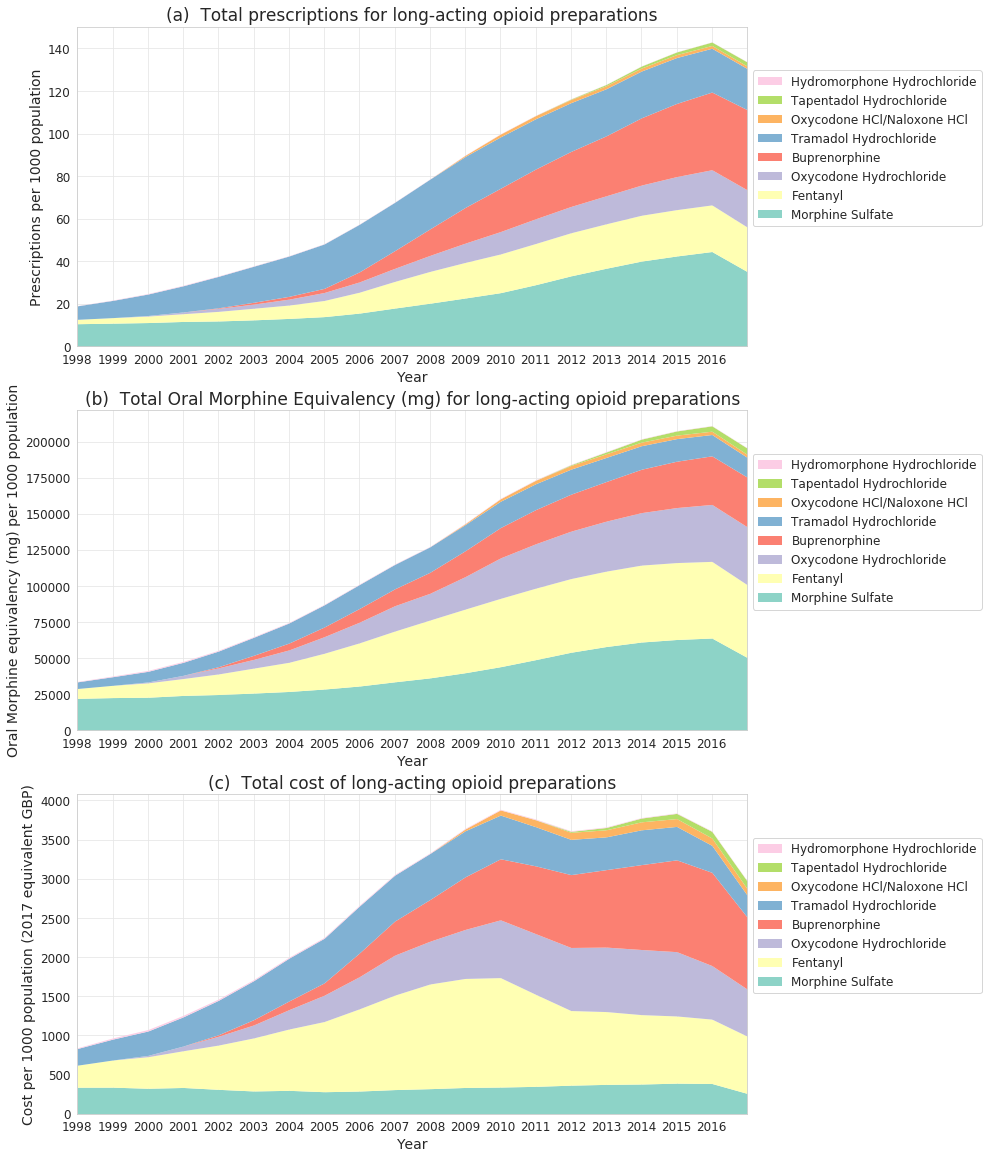

In [7]:
la_df = dfl.loc[(dfl['Is_LA'] == True)]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
sns.set_palette("Set3",n_colors=14)

dft = la_df.groupby("chem_substance")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dft.chem_substance.drop_duplicates())

grp = pd.DataFrame(sort_order).reset_index()
grp["chemical"] = np.where(grp.index>11,"Other",grp.chem_substance)
dfl2 = la_df.merge(grp,on="chem_substance")

dfs = dfl2.groupby("chemical")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dfs.chemical)


s=[(0,'(a)  Total prescriptions for long-acting opioid preparations','Prescriptions per 1000 population','items_per_1000'),
   (1,'(b)  Total Oral Morphine Equivalency (mg) for long-acting opioid preparations','Oral Morphine equivalency (mg) per 1000 population',"total_ome_per_1000"),
   (2,'(c)  Total cost of long-acting opioid preparations','Cost per 1000 population (2017 equivalent GBP)','cost_per_1000')]

fig = plt.figure(figsize=(15,20))
   
for i in s:
    ax = plt.subplot(3,1,i[0]+1)  # layout and position of subplot
    if i[0]==0:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==1:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==2:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    dfp.plot(ax=ax, kind='area',  linewidth=0)
    ax.set_xticks(np.arange(1998, 2017, step=1))
    ax.set_xlabel('Year', size="14")
    ax.set_ylabel(i[2], size="14")
    ax.tick_params(labelsize=12)
    ax.set_title(i[1], size="17")
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(reversed(handles), reversed(labels),loc='center left', fontsize="12",bbox_to_anchor=(1, .62))

plt.show()

## Plot data - High dose opioids

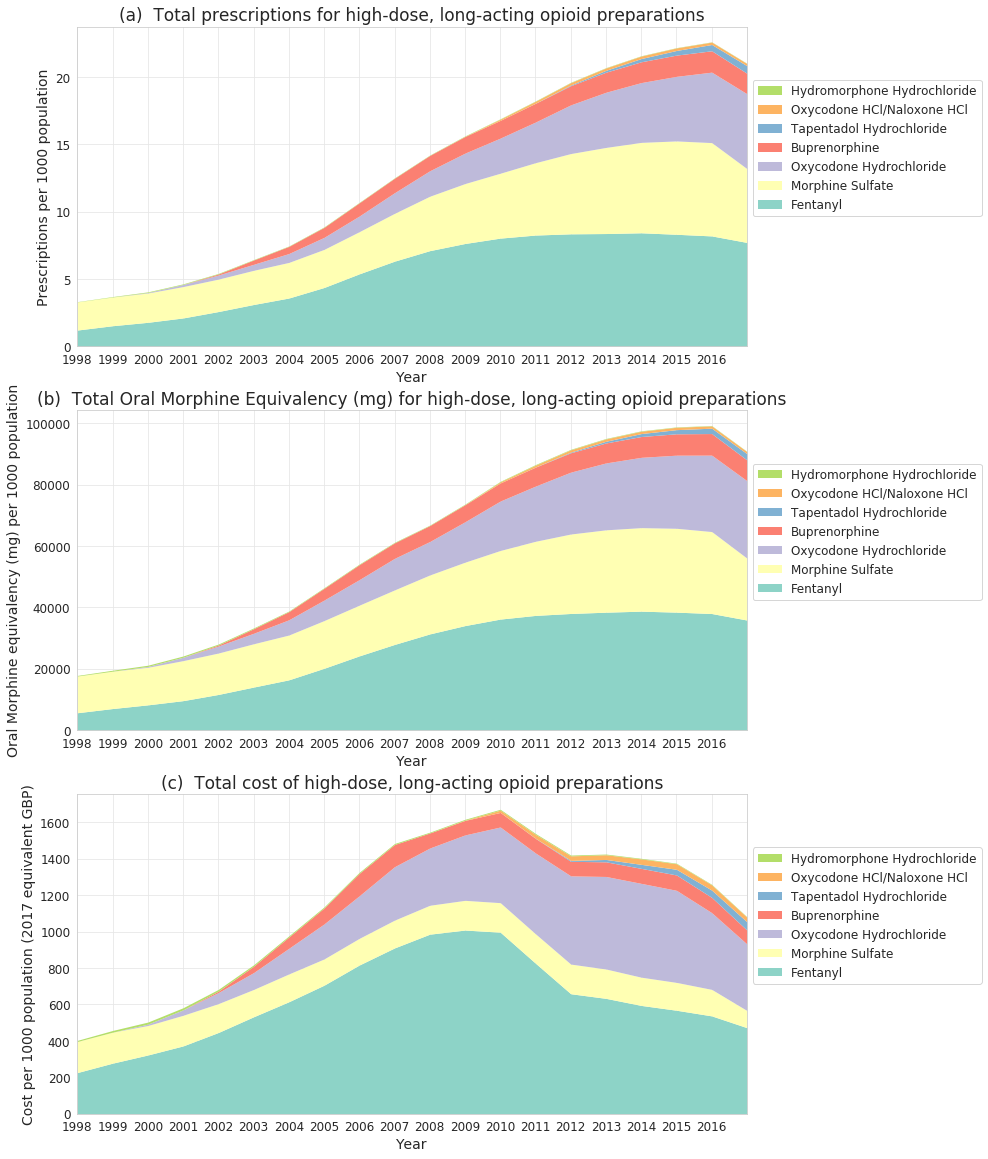

In [8]:
high_df = dfl.loc[(dfl['Is_High_LA'] == "High dose")]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
sns.set_palette("Set3",n_colors=14)

dft = high_df.groupby("chem_substance")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dft.chem_substance.drop_duplicates())

grp = pd.DataFrame(sort_order).reset_index()
grp["chemical"] = np.where(grp.index>11,"Other",grp.chem_substance)
dfl2 = high_df.merge(grp,on="chem_substance")

dfs = dfl2.groupby("chemical")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})

s=[(0,'(a)  Total prescriptions for high-dose, long-acting opioid preparations','Prescriptions per 1000 population','items_per_1000'),
   (1,'(b)  Total Oral Morphine Equivalency (mg) for high-dose, long-acting opioid preparations','Oral Morphine equivalency (mg) per 1000 population',"total_ome_per_1000"),
   (2,'(c)  Total cost of high-dose, long-acting opioid preparations','Cost per 1000 population (2017 equivalent GBP)', 'cost_per_1000')]

fig = plt.figure(figsize=(15,20))
   
for i in s:
    ax = plt.subplot(3,1,i[0]+1)  # layout and position of subplot
    if i[0]==1:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==0:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==2:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    dfp.plot(ax=ax, kind='area',  linewidth=0)
    ax.set_xticks(np.arange(1998, 2017, step=1))
    ax.set_xlabel('Year', size="14")
    ax.set_ylabel(i[2], size="14")
    ax.tick_params(labelsize=12)
    ax.set_title(i[1], size="17")
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(reversed(handles), reversed(labels),loc='center left', fontsize="12",bbox_to_anchor=(1, .62))

#plt.savefig("opioids_Figure2_revised.pdf", transparent=True, dpi=300)   
plt.show()


## Plot data - less popular opioids (expand "Other" group)

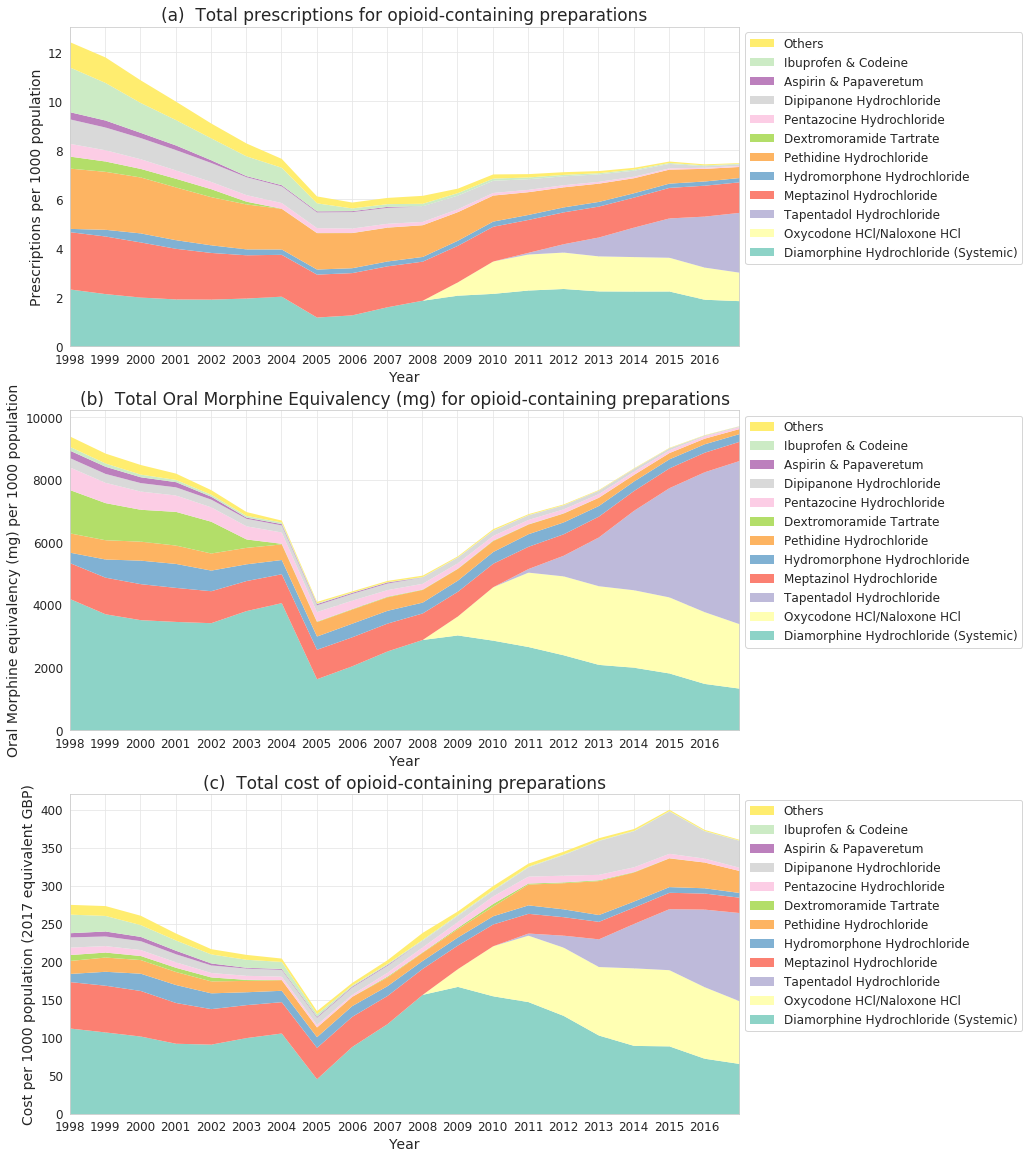

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
sns.set_palette("Set3",n_colors=14)

dft = dfl.groupby("chem_substance")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dft.chem_substance.drop_duplicates())

grp = pd.DataFrame(sort_order).reset_index()
grp = grp.loc[grp.index>=11].reset_index()
grp["chemical"] = np.where(grp.index>10,"Others",grp.chem_substance)
grp["other_flag"] = np.where(grp.index>10,0,1)
dfl2 = dfl.merge(grp,on="chem_substance")

dfs = dfl2.groupby(["other_flag","chemical"])["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"}).sort_values(by=["other_flag","total_ome_all_years"],ascending=False)
sort_order = pd.Series(dfs.chemical)


s=[(0,'(a)  Total prescriptions for opioid-containing preparations','Prescriptions per 1000 population','items_per_1000'),
   (1,'(b)  Total Oral Morphine Equivalency (mg) for opioid-containing preparations','Oral Morphine equivalency (mg) per 1000 population',"total_ome_per_1000"),
   (2,'(c)  Total cost of opioid-containing preparations','Cost per 1000 population (2017 equivalent GBP)','cost_per_1000')]

fig = plt.figure(figsize=(15,20))
   
for i in s:
    ax = plt.subplot(3,1,i[0]+1)  # layout and position of subplot
    if i[0]==0:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==1:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==2:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    dfp.plot(ax=ax, kind='area',  linewidth=0)
    ax.set_xticks(np.arange(1998, 2017, step=1))
    ax.set_xlabel('Year', size="14")
    ax.set_ylabel(i[2], size="14")
    ax.tick_params(labelsize=12)
    ax.set_title(i[1], size="17")
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(reversed(handles), reversed(labels),loc='center left', fontsize="12",bbox_to_anchor=(1, .62))
    

plt.show()


## Plot data - low-dose opioids

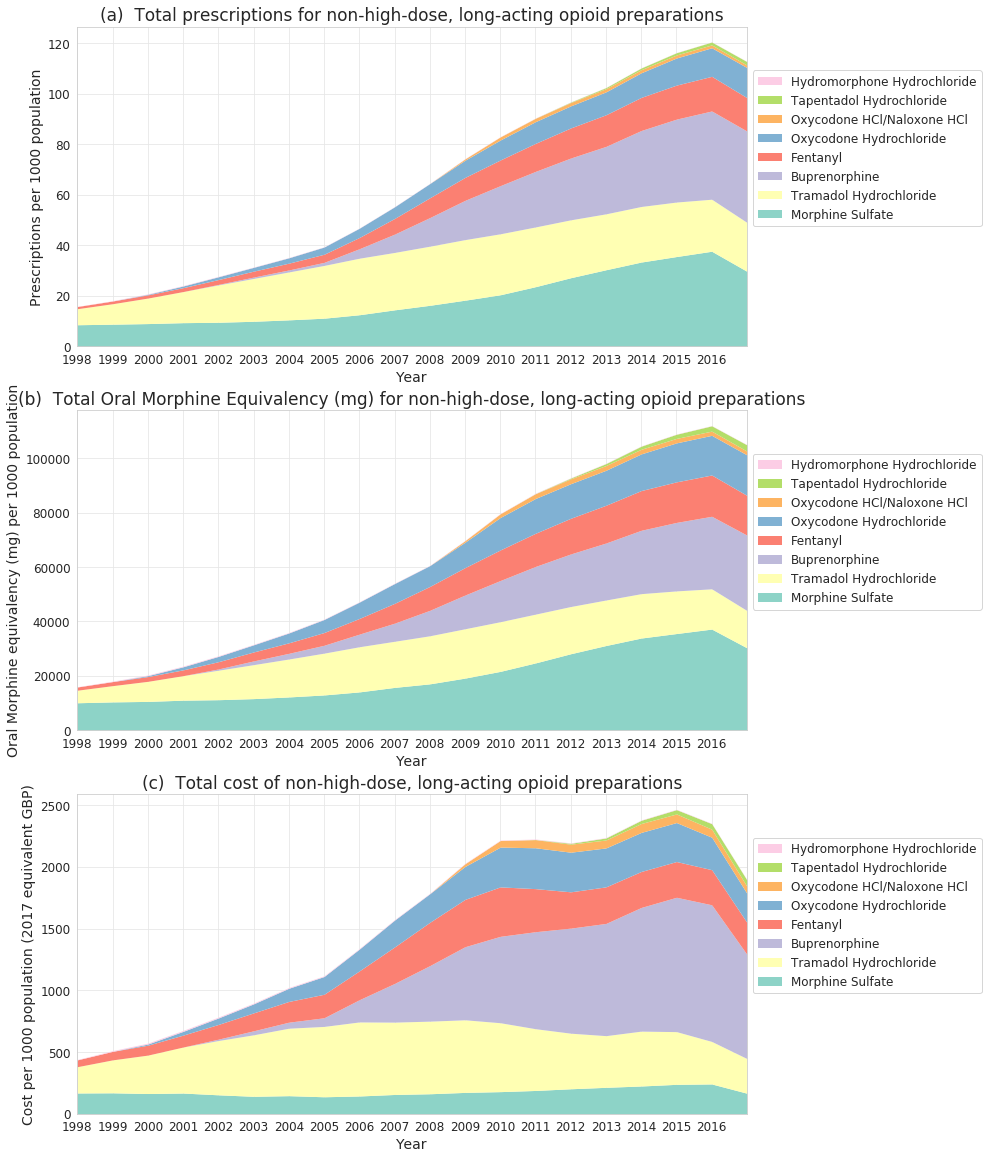

In [10]:
low_df = dfl.loc[(dfl['Is_LA'] == True)&(dfl['Is_High_LA'] != "High dose")]

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
sns.set_palette("Set3",n_colors=14)

dft = low_df.groupby("chem_substance")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})
sort_order = pd.Series(dft.chem_substance.drop_duplicates())

grp = pd.DataFrame(sort_order).reset_index()
grp["chemical"] = np.where(grp.index>11,"Other",grp.chem_substance)
dfl2 = low_df.merge(grp,on="chem_substance")

dfs = dfl2.groupby("chemical")["total_ome_per_1000"].sum().sort_values(ascending=False).reset_index().rename(columns={"total_ome_per_1000":"total_ome_all_years"})

s=[(0,'(a)  Total prescriptions for non-high-dose, long-acting opioid preparations','Prescriptions per 1000 population','items_per_1000'),
   (1,'(b)  Total Oral Morphine Equivalency (mg) for non-high-dose, long-acting opioid preparations','Oral Morphine equivalency (mg) per 1000 population',"total_ome_per_1000"),
   (2,'(c)  Total cost of non-high-dose, long-acting opioid preparations','Cost per 1000 population (2017 equivalent GBP)', 'cost_per_1000')]

fig = plt.figure(figsize=(15,20))
   
for i in s:
    ax = plt.subplot(3,1,i[0]+1)  # layout and position of subplot
    if i[0]==1:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==0:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    if i[0]==2:
        dfp = dfl2.groupby(['year','chemical'])[i[3]].sum().unstack()
        dfp = dfp.reindex(columns=sort_order)
    dfp.plot(ax=ax, kind='area',  linewidth=0)
    ax.set_xticks(np.arange(1998, 2017, step=1))
    ax.set_xlabel('Year', size="14")
    ax.set_ylabel(i[2], size="14")
    ax.tick_params(labelsize=12)
    ax.set_title(i[1], size="17")
    handles, labels = ax.get_legend_handles_labels()
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(reversed(handles), reversed(labels),loc='center left', fontsize="12",bbox_to_anchor=(1, .62))

plt.show()


## Find first appearances in prescribing data for each opioid (broken down by formulation)

In [11]:

q = '''-- opioid long term data extraction with classification by formulation
WITH a AS (
SELECT 
  year,
  l.chem_substance,
  REGEXP_EXTRACT(l.drug_name, r'[^_]+_(.*?)(?:[0-9]+.*)?$') AS mid_string,
  l.Is_LA, 
  l.Is_High_LA,
  sum(itemsper1000) as items_per_1000, 
  sum(quantityper1000) as quantity_per_1000,
  sum(quantityper1000*dose_per_unit*new_ome_multiplier) AS total_ome_per_1000,
  sum(Infl_corr_Cost_per1000) as cost_per_1000
FROM ebmdatalab.helen.trends_from_pca_final_2017 p
INNER JOIN (SELECT distinct drug_name, chem_substance, Is_LA, Is_High_LA, dose_per_unit, new_ome_multiplier FROM ebmdatalab.richard.opioid_converter) l on l.drug_name = p.drug_name

GROUP BY 
  year,
  chem_substance,
  mid_string,
  Is_LA, 
  Is_High_LA )
  
  
  
  
  SELECT DISTINCT chem_substance, --RTRIM(mid_string) AS mid_string,
  CASE  WHEN RTRIM(mid_string) IN ('Vag Crm','Vag Gel','Oily Crm','Crm','Gel','Lot','Gel','Soln','Gel Sach','Oint','Intrasite Gel') THEN 'Cream/Gel'    --this will only compare identical formulations --  PROBABLY WANT TO INCLUDE EQUIVALENT FORMULATIONS --
        WHEN RTRIM(mid_string) IN ('Tab Buccal','Buccal Film','Tab Subling','Disper Tab','Orodisper Tab','Loz','Tab Sublingual','Oral Lyophilisate') THEN 'Lozenge/Sublingual tab'
        WHEN RTRIM(mid_string) IN ('Tab Solb','Eff Tab','Solb Tab','Tab Eff','Pdr Sach','Eff Pdr Sach','Susp Gran Sach') THEN 'Soluble Tab/Powder'
        WHEN RTRIM(mid_string) LIKE '%Tab' OR RTRIM(mid_string) LIKE '%Cap' OR RTRIM(mid_string) IN ('Cap','Cap E/C','Capl') THEN 'Tab/Cap'
        WHEN RTRIM(mid_string) LIKE '%Susp%' OR
          RTRIM(mid_string) IN ('Liq Spec','Oral Soln','Sod Oral Soln','Elix','Liq','Oral Susp','Tinct','Liq Conc','Oral Dps','Oral Soln Conc','Oral Conc','Mix','Elix BPC Inc Duty','Methadone HCl Mix') THEN 'Liquid'
        WHEN RTRIM(mid_string) LIKE '%Inj' OR RTRIM(mid_string) IN ('I/V Inf','Syr','Inj','(S)','Lact Inj','P','Morph Sulf','Morph Sulph','Implant') THEN 'Injectible'
        WHEN RTRIM(mid_string) IN ('Patch','Patches','TransdermalPatch','Transdermal Patch','T/Derm Patch') THEN 'Patch'
        WHEN RTRIM(mid_string) IN ('Lact Suppos','Suppos') THEN 'Suppository'
        WHEN RTRIM(mid_string) LIKE '%Nsl Spy%' or RTRIM(mid_string) = 'Reefer' THEN 'Inhalation'
        ELSE RTRIM(mid_string) END AS formulation,
        MIN(year) AS min_year
   FROM a
   GROUP BY chem_substance,  formulation
   ORDER BY chem_substance'''

tbl = bq.cached_read(q, csv_path='by_formulation.zip')
tbl.head()

,chem_substance,formulation,min_year
0,Aspirin & Papaveretum,Lozenge/Sublingual tab,1998
1,Buprenorphine,Patch,2002
2,Buprenorphine,Injectible,1998
3,Buprenorphine,Lozenge/Sublingual tab,1998
4,Co-codamol,Soluble Tab/Powder,1998


In [12]:
#tbl[["chem_substance","min_year","formulation"]].sort_values(by=["chem_substance","min_year"]).set_index(["chem_substance","min_year"])
tab = pd.DataFrame(tbl.groupby(["chem_substance","min_year"])["formulation"].apply(lambda x:  "%s" % ', '.join(x)))
#tab.to_csv('first_year.csv')
tab

formulation
chem_substance                         min_year                                                   
Aspirin & Papaveretum                  1998                                 Lozenge/Sublingual tab
Buprenorphine                          1998                     Injectible, Lozenge/Sublingual tab
                                       2002                                                  Patch
Co-codamol                             1998                            Soluble Tab/Powder, Tab/Cap
                                       2010                                                 Liquid
Co-codaprin                            1998                                                Tab/Cap
Co-dydramol                            1998                            Tab/Cap, Soluble Tab/Powder
                                       2003                                                 Liquid
Co-proxamol                            1998                                        Tab/Cap, Liquid
Codeine Phosphate                      1998                            Tab/Cap, Injectible, Liquid
                                       2011                                            Suppository
Dextromoramide Tartrate                1998                                   Suppository, Tab/Cap
Dextropropoxyphene                     1998                                                Tab/Cap
Diamorphine Hydrochloride (Systemic)   1998                        Inhalation, Tab/Cap, Injectible
                                       2003                                                 Liquid
                                       2012                                            Suppository
Dihydrocodeine Tartrate                1998                            Liquid, Tab/Cap, Injectible
Dipipanone Hydrochloride               1998                                        Tab/Cap, Liquid
Fentanyl                               1998                                                  Patch
                                       2001                                 Lozenge/Sublingual tab
                                       2010                                             Inhalation
Hydromorphone Hydrochloride            1998                                                Tab/Cap
                                       2005                                             Injectible
Ibuprofen & Codeine                    1998                                                Tab/Cap
Meptazinol Hydrochloride               1998                                    Tab/Cap, Injectible
Methadone Hydrochloride                1998                        Inhalation, Injectible, Tab/Cap
Morphine Hydrochloride                 1998                                     Liquid, Injectible
                                       2010                                            Suppository
Morphine Sulfate                       1998      Soluble Tab/Powder, Liquid, Tab/Cap, Injectibl...
                                       2010                                              Cream/Gel
Morphine Tartrate & Cyclizine Tartrate 1998                                             Injectible
Nalbuphine Hydrochloride               1998                                             Injectible
Oxycodone                              1998                                            Suppository
Oxycodone HCl/Naloxone HCl             2009                                                Tab/Cap
                                       2015                                                 Liquid
Oxycodone Hydrochloride                2000                                        Liquid, Tab/Cap
                                       2003                                             Injectible
Papaveretum                            1998                                             Injectible
Pentazocine Hydrochloride              1998                                                Tab/Cap
Pentazocine Lactate         

# Practice and CCG level analysis

In [13]:

#GBQ_PROJECT_ID = '620265099307'


# returns 1.2m rows - saved as 235MB of zipped csvs, loaded in next cell
q = '''
-- opioids - including practices open/prescribing but not prescribing opioids
WITH opioid_prescribing AS (
select p.*
FROM ebmdatalab.hscic.normalised_prescribing_standard p
INNER JOIN (SELECT DISTINCT bnf_code FROM `richard.opioid_converter`) o
ON p.bnf_code = o.bnf_code
),

-- create a table of all prescribing by practice by month.
A AS (
  SELECT practice, pct,
    CAST(month AS DATE) AS year_mon,
    sum(items) AS items
  FROM ebmdatalab.hscic.normalised_prescribing_standard p
  GROUP BY  practice, pct, year_mon),

-- inner join to practice list to filter for type 4 practices, and for months they had more than zero patients and more than zero total prescribing. 
q2 AS (
  SELECT a.practice, 
    a.pct,
    prac.status_code,
    a.year_mon, 
    MAX(a.items) AS items, 
    MAX(total_list_size) AS total_list_size
  FROM ebmdatalab.hscic.practice_statistics_all_years s
  LEFT JOIN A ON  a.practice = s.practice AND a.year_mon = CAST(s.month AS DATE)  
  INNER JOIN  ebmdatalab.hscic.practices prac ON prac.code=a.practice AND prac.setting = 4 
  WHERE total_list_size > 0 and items > 0
  GROUP BY practice, pct, status_code, year_mon )

-- join practices to opioid prescribing data  
SELECT 
  COALESCE(p.pct,q2.pct) AS pct,
  q2.practice,
  q2.status_code,
  q2.year_mon AS month,
  l.chem_substance,
  Is_LA,
  Is_High_LA,
  sum(p.items) as items, 
  sum(quantity) as quantity,
  sum(quantity*dose_per_unit*new_ome_multiplier) AS total_ome,
  sum(net_cost) as net_cost,
  sum(actual_cost) as actual_cost
FROM q2 
LEFT JOIN opioid_prescribing p ON p.practice = q2.practice AND CAST(p.month AS DATE) = q2.year_mon  
LEFT JOIN (SELECT distinct bnf_code, chem_substance, Is_High_LA, Is_LA, dose_per_unit, new_ome_multiplier FROM ebmdatalab.richard.opioid_converter) l on l.bnf_code = p.bnf_code
GROUP BY 
  pct,
  practice,
  status_code,
  month,
  chem_substance,
  Is_LA,
  Is_High_LA
'''


In [72]:
import glob
import pandas as pd
import numpy as np

schema = {
    "pct": "category",
    "practice": "category",
    "status_code": "category",
    "chem_substance": "category",
    "Is_LA": "category",
    "Is_High_LA": "category",
    "items": pd.Int16Dtype(),
    "quantity": pd.Int64Dtype(),
    "total_ome": np.float32,
    "net_cost": np.float32,
    "actual_cost": np.float32,
}


def as_true_false(val):
    "Convert to true/false strings"
    if isinstance(val, str):
        if not val:
            val = None
        elif str(val).lower() == "true":
            val = True
        else:
            val = False
    else:
        if np.isnan(val):
            val = None
        else:
            if val:
                val = True
            else:
                val = False
    return val


converters = {"Is_LA": as_true_false, "Is_High_LA": as_true_false}
df1 = None
for path in sorted(glob.glob("opioid*gz")):
    print("loading {}....".format(path))
    if df1 is None:
        df1 = pd.read_csv(path, dtype=schema, parse_dates=["month"], date_parser=lambda col: pd.to_datetime(col, utc=True), converters=converters, low_memory=False)
    else:
        df1 = pd.concat([df1, pd.read_csv(path, dtype=schema, parse_dates=["month"], date_parser=lambda col: pd.to_datetime(col, utc=True), converters=converters, low_memory=False)], ignore_index=True)

#for col in ['pct', 'practice', 'status_code', 'chem_substance', 'Is_LA', 'Is_High_LA']:
#    # Because of the concat above, some of these are converted to objects where new categories are introduced
#    # between loop iterations
#    df1[col] = df1[col].astype("category")
for col in ['Is_LA', 'Is_High_LA']:
    # Because of the concat above, some of these are converted to objects where new categories are introduced
    # between loop iterations
    df1[col] = df1[col].astype("category")

loading opioids_000000000000.csv.gz....


/home/sebbacon/.virtualenvs/opioid/lib/python3.6/site-packages/ipykernel_launcher.py:45: ParserWarning: Both a converter and dtype were specified for column Is_LA - only the converter will be used
/home/sebbacon/.virtualenvs/opioid/lib/python3.6/site-packages/ipykernel_launcher.py:45: ParserWarning: Both a converter and dtype were specified for column Is_High_LA - only the converter will be used


loading opioids_000000000001.csv.gz....


/home/sebbacon/.virtualenvs/opioid/lib/python3.6/site-packages/ipykernel_launcher.py:47: ParserWarning: Both a converter and dtype were specified for column Is_LA - only the converter will be used
/home/sebbacon/.virtualenvs/opioid/lib/python3.6/site-packages/ipykernel_launcher.py:47: ParserWarning: Both a converter and dtype were specified for column Is_High_LA - only the converter will be used


loading opioids_000000000002.csv.gz....
loading opioids_000000000003.csv.gz....
loading opioids_000000000004.csv.gz....
loading opioids_000000000005.csv.gz....
loading opioids_000000000006.csv.gz....
loading opioids_000000000007.csv.gz....
loading opioids_000000000008.csv.gz....
loading opioids_000000000009.csv.gz....


In [73]:
# import practice list size data

GBQ_PROJECT_ID = '620265099307'

q2 = '''SELECT practice, 
    pct_id AS CCG,
    month,
    total_list_size
from ebmdatalab.hscic.practice_statistics_all_years 
'''

pop = bq.cached_read(q2, csv_path='practice_list_size.zip', use_bqstorage_api=True)
pop['month'] = pd.to_datetime(pop['month'])
pop.head()

,practice,CCG,month,total_list_size
0,A81633,00M,2015-08-01 00:00:00+00:00,694
1,A83643,116,2015-08-01 00:00:00+00:00,0
2,B83662,02R,2015-08-01 00:00:00+00:00,0
3,B83667,02R,2015-08-01 00:00:00+00:00,0
4,B83696,02R,2015-08-01 00:00:00+00:00,0


In [74]:
df1.head()

,pct,practice,status_code,month,chem_substance,Is_LA,Is_High_LA,items,quantity,total_ome,net_cost,actual_cost
0,00P,A89018,A,2010-12-01 00:00:00+00:00,Ibuprofen & Codeine,False,NaN,1,24,30.719999,3.140000,2.920000
1,00M,A81058,A,2018-06-01 00:00:00+00:00,Hydromorphone Hydrochloride,False,False,1,112,728.000000,17.639999,16.379169
2,06N,E82095,D,2013-08-01 00:00:00+00:00,Pentazocine Hydrochloride,False,NaN,1,112,2072.000000,114.160004,105.400002
3,10D,G82057,A,2012-04-01 00:00:00+00:00,Pentazocine Hydrochloride,False,NaN,1,56,1036.000000,57.080002,52.630001
4,10Q,K84052,A,2013-01-01 00:00:00+00:00,Hydromorphone Hydrochloride,True,False,1,180,3600.000000,92.410004,85.449997


### Load, organise and filter practice-level data

In [75]:
import pandas as pd
import numpy as np


# convert dates to datetime format
#df1["month"] = pd.to_datetime(df1.month)

# tidy data and replace nulls with appropriate blanks
#df1["High_LA"] = False
#df1.loc[(df1["Is_High_LA"]=="TRUE")|(df1["Is_High_LA"].astype(str)=="True"),"High_LA"] = True
#df1["LA"] = False
#df1.loc[df1["Is_LA"].astype(str)=="True","LA"] = True
  
from pandas.api.types import is_numeric_dtype  
for y in df1.columns:
    if is_numeric_dtype(df1[y].dtype):
          df1[y].fillna(0,inplace=True)


# count included practices and CCGs
print (df1.practice.nunique()," total practices")


# Filter to latest 6 months only and currently active practices with standard CCG codes (for regression and mapping)

dftest = df1.loc[(df1["month"]>df1["month"].max()-pd.DateOffset(months=6))]
print ("Latest ", dftest.month.nunique()," months only (" , df1["month"].max()-pd.DateOffset(months=5), " to ", df1["month"].max(), "):") 
print (dftest.practice.nunique()," practices including those not active / without valid CCG")

dftestc = dftest.loc[dftest["status_code"] == "C"]
print (dftestc.practice.nunique()," practices closed")
dftestd = dftest.loc[dftest["status_code"] == "D"]
print (dftestd.practice.nunique()," practices dormant")

dftest = dftest.loc[(dftest["pct"].str.match(r"([0-9]{2})([A-Za-z])")) & (dftest["status_code"] == "A")]
print (dftest.practice.nunique()," practices included")
print (dftest.pct.nunique()," CCGs")

8126  total practices
Latest  6  months only ( 2018-09-01 00:00:00+00:00  to  2019-02-01 00:00:00+00:00 ):
7032  practices including those not active / without valid CCG
2  practices closed
93  practices dormant
6936  practices included
195  CCGs


## Practice data for regression analysis

In [76]:
#

## Practice trends analysis (monthly data, 2010-2018)

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13484221 entries, 0 to 13484220
Data columns (total 12 columns):
pct               category
practice          object
status_code       category
month             datetime64[ns, UTC]
chem_substance    object
Is_LA             category
Is_High_LA        category
items             Int16
quantity          Int64
total_ome         float32
net_cost          float32
actual_cost       float32
dtypes: Int16(1), Int64(1), category(4), datetime64[ns, UTC](1), float32(3), object(2)
memory usage: 681.6+ MB


### (a) Create calculated fields e.g total OME per 1000 population

In [78]:

df = df1.copy()

# tidy data
df = df.drop(["pct","quantity","net_cost"],axis=1).reset_index(drop=True)

# create columns for high dose and long acting OME
df.loc[df["Is_LA"]==True,"Items Long Acting"] = df["items"]
df.loc[df["Is_High_LA"]==True,"Items High Dose"] = df["items"]
df.loc[df["Is_LA"]==True,"OME Long Acting"] = df["total_ome"]
df.loc[df["Is_High_LA"]==True,"OME High Dose"] = df["total_ome"]
df.loc[df["Is_LA"]==True,"Cost Long Acting"] = df["actual_cost"]
df.loc[df["Is_High_LA"]==True,"Cost High Dose"] = df["actual_cost"]


In [79]:
df2 = df.rename(columns={"total_ome":"Total OME",
                          "items":"Total Items",
                          "actual_cost":"Total Cost"})

df2 = df2.merge(pop[["practice","month","total_list_size"]], on=["practice","month"])
df2["Percent high dose (by OME)"] = 100*df2["OME High Dose"]/df2["OME Long Acting"]
df2["Percent high dose (by items)"] = 100*df2["Items High Dose"]/df2["Items Long Acting"]
df2["Total OME (per 1000)"] = 1000*df2["Total OME"]/df2.total_list_size
df2["Total items (per 1000)"] = 1000*df2["Total Items"]/df2.total_list_size
df2["Total cost (per 1000)"] = 1000*df2["Total Cost"]/df2.total_list_size
df2["Cost high dose opioids (per 1000)"] = 1000*df2["Cost High Dose"]/df2.total_list_size
df2["Cost high dose opioids (per item)"] = df2["Cost High Dose"]/df2["Items High Dose"]

df2["High dose items (per 1000)"] = 1000*df2["Items High Dose"]/df2.total_list_size
df2["Long acting items (per 1000)"] = 1000*df2["Items Long Acting"]/df2.total_list_size
df2["High dose OME (per 1000)"] = 1000*df2["OME High Dose"]/df2.total_list_size
df2["Long acting OME (per 1000)"] = 1000*df2["OME Long Acting"]/df2.total_list_size
df2.head()

,practice,status_code,month,chem_substance,Is_LA,Is_High_LA,Total Items,Total OME,Total Cost,Items Long Acting,...,Percent high dose (by items),Total OME (per 1000),Total items (per 1000),Total cost (per 1000),Cost high dose opioids (per 1000),Cost high dose opioids (per item),High dose items (per 1000),Long acting items (per 1000),High dose OME (per 1000),Long acting OME (per 1000)
0,A89018,A,2010-12-01 00:00:00+00:00,Ibuprofen & Codeine,False,NaN,1,30.719999,2.920000,NaN,...,NaN,6.121961,0.199283,0.581905,NaN,NaN,NaN,NaN,NaN,NaN
1,A89018,A,2010-12-01 00:00:00+00:00,Fentanyl,True,True,10,73800.000000,1584.020020,10.0,...,100.0,14707.054603,1.992826,315.667597,315.667601,158.402002,1.992826,1.992826,14707.054603,14707.054603
2,A89018,A,2010-12-01 00:00:00+00:00,Buprenorphine,True,False,4,2688.000000,114.080002,4.0,...,NaN,535.671582,0.797130,22.734157,NaN,NaN,NaN,0.797130,NaN,535.671582
3,A89018,A,2010-12-01 00:00:00+00:00,Oxycodone Hydrochloride,True,False,14,12320.000000,275.760010,14.0,...,NaN,2455.161419,2.789956,54.954165,NaN,NaN,NaN,2.789956,NaN,2455.161419
4,A89018,A,2010-12-01 00:00:00+00:00,Co-dydramol,False,NaN,39,5116.000000,165.309998,NaN,...,NaN,1019.529693,-5.288163,32.943404,NaN,NaN,NaN,NaN,NaN,NaN


### (b) Calculate deciles

In [80]:
df3 = df2
x = np.arange(0.1, 1, 0.1) # set range of deciles required (0.1-0.9)
pc = df3.groupby('month').quantile(x)  # calculate deciles for each month
pc = pd.DataFrame(pc.stack()).reset_index().rename(columns={"level_1": 'percentile',"level_2": 'measure', 0:"value"}) # rearrange
pc["index"] = (pc.percentile*10).map(int) # create integer range of percentiles as integers are better for charts
pc.head(12)

,month,percentile,measure,value,index
0,2010-10-01 00:00:00+00:00,0.1,Total Items,1,1
1,2010-10-01 00:00:00+00:00,0.1,Total OME,588,1
2,2010-10-01 00:00:00+00:00,0.1,Total Cost,11.44,1
3,2010-10-01 00:00:00+00:00,0.1,Items Long Acting,1,1
4,2010-10-01 00:00:00+00:00,0.1,Items High Dose,1,1
5,2010-10-01 00:00:00+00:00,0.1,OME Long Acting,1680,1
6,2010-10-01 00:00:00+00:00,0.1,OME High Dose,3600,1
7,2010-10-01 00:00:00+00:00,0.1,Cost Long Acting,27.19,1
8,2010-10-01 00:00:00+00:00,0.1,Cost High Dose,38,1
9,2010-10-01 00:00:00+00:00,0.1,total_list_size,2658,1


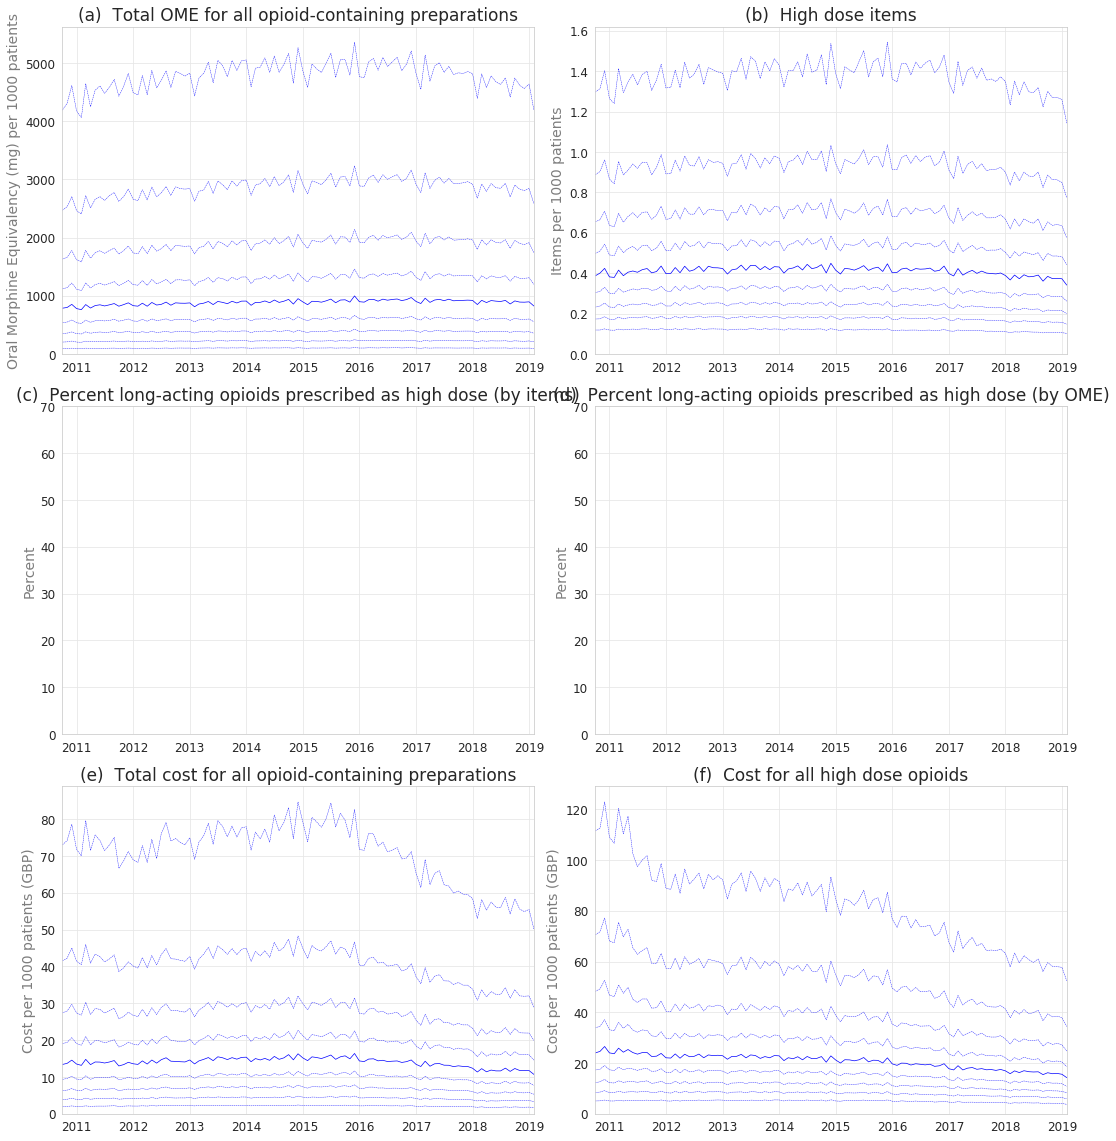

In [81]:

import matplotlib.pyplot as plt
import datetime
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = pc.sort_values(by=["month","measure"])
#dfp['month'] = dfp['month'].astype(str)
# set format for dates:
#dfp['dates'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['month']]


# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'Total OME (per 1000)',0,0,"Oral Morphine Equivalency (mg) per 1000 patients", "(a)  Total OME for all opioid-containing preparations"), 
     (1,'High dose items (per 1000)',0,1,"Items per 1000 patients", "(b)  High dose items"), 
     (2,'Percent high dose (by items)',1,0,"Percent",'(c)  Percent long-acting opioids prescribed as high dose (by items)'), 
     (3,'Percent high dose (by OME)',1,1,"Percent",'(d)  Percent long-acting opioids prescribed as high dose (by OME)'), 
     (4,'Total cost (per 1000)',2,0,"Cost per 1000 patients (GBP)", "(e)  Total cost for all opioid-containing preparations"), 
     (5,'Cost high dose opioids (per 1000)',2,1,"Cost per 1000 patients (GBP)", "(f)  Cost for all high dose opioids")
    ]


fig = plt.figure(figsize=(18,20)) 
gs = gridspec.GridSpec(3,2)  # grid layout for subplots

# Plot each subplot using a loop
for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    for decile in range(1,10):   # plot each decile line
        data = dfp.loc[(dfp['measure']==i[1]) & (dfp['index']==decile)]
        if decile == 5:
            ax.plot(data["month"],data['value'],'b-',linewidth=0.7)
        else:
            ax.plot(data["month"],data['value'],'b--',linewidth=0.4)
    ax.set_ylabel(i[4], size =14, alpha=0.6)
    ax.set_title(i[5],size = 17)
    ax.set_ylim([0,1.05*data["value"].max()])
    if  i[4]=="Percent":    # set y axis limit only for percentage measure
        ax.set_ylim([0, 70])
    ax.tick_params(labelsize=12)
    ax.set_xlim([dfp['month'].min(), dfp['month'].max()]) # set x axis range as full date range

plt.subplots_adjust(wspace = 0.13,hspace = 0.16)

#plt.savefig("opioids_Figure4_revised.pdf", transparent=True, dpi=300)  
plt.show()

## Variation by CCG (maps)

### (a) Aggregate data, create calculated fields

In [82]:
df4[np.isinf(df4['actual_cost'])].head()

,pct,chem_substance,Is_LA,Is_High_LA,items,total_ome,actual_cost,fent_ome,morph_ome,oxyco_ome,practice_count
94,00D,Buprenorphine,True,False,6985.0,inf,inf,0.0,0.0,0.0,1
131,00D,Fentanyl,True,True,1494.0,inf,inf,inf,0.0,0.0,1
154,00D,Morphine Sulfate,True,False,14988.0,inf,inf,0.0,0.0,0.0,1
167,00D,Oxycodone Hydrochloride,True,True,2037.0,inf,inf,0.0,0.0,inf,1
186,00J,Buprenorphine,True,False,4397.0,inf,inf,0.0,0.0,0.0,1


In [83]:
dftest.actual_cost.sum()
# 6.6 million - too big

140326290.0

In [84]:
pd.DataFrame(df4.groupby(["pct","Is_LA","Is_High_LA"]).sum()).reset_index().head()

,pct,Is_LA,Is_High_LA,items,total_ome,actual_cost,fent_ome,morph_ome,oxyco_ome,practice_count
0,00C,False,False,926.0,inf,15688.0,0.0,0.0,0.0,23
1,00C,False,True,0.0,0.0,0.0,0.0,0.0,0.0,23
2,00C,True,False,9571.0,inf,inf,0.0,0.0,0.0,23
3,00C,True,True,2195.0,inf,inf,inf,inf,inf,23
4,00D,False,False,2634.0,inf,39136.0,0.0,0.0,0.0,23


In [85]:
# filter to latest 6 months only
df4 = dftest
df4 = df4.drop(["quantity","net_cost"],axis=1)

# group to ccg level and combine the 6 months
df4 = pd.DataFrame(df4.groupby(["pct","chem_substance","Is_LA","Is_High_LA"])["items","total_ome","actual_cost"].sum()).reset_index()

df4["fent_ome"] = np.where((df4["chem_substance"] == "Fentanyl")& (df4["Is_High_LA"]==True),df4["total_ome"],0)
df4["morph_ome"] = np.where((df4["chem_substance"] == "Morphine Sulfate")& (df4["Is_High_LA"]==True),df4["total_ome"],0)
df4["oxyco_ome"] = np.where((df4["chem_substance"] == "Oxycodone Hydrochloride")& (df4["Is_High_LA"]==True),df4["total_ome"],0)
df4["practice_count"] = 1

# aggregate chem substances
df = pd.DataFrame(df4.groupby(["pct","Is_LA","Is_High_LA"]).sum()).reset_index()

# create columns for high dose and long acting OME
df.loc[df["Is_LA"]==True,"Items Long Acting"] = df["items"]
df.loc[df["Is_High_LA"]==True,"Items High Dose"] = df["items"]
df.loc[df["Is_LA"]==True,"OME Long Acting"] = df["total_ome"]
df.loc[df["Is_High_LA"]==True,"OME High Dose"] = df["total_ome"]
df.loc[df["Is_LA"]==True,"Cost Long Acting"] = df["actual_cost"]
df.loc[df["Is_High_LA"]==True,"Cost High Dose"] = df["actual_cost"]

df = df.drop(["Is_LA","Is_High_LA"],axis=1)
df = df.groupby(["pct"]).sum().reset_index()
df.head()


,pct,items,total_ome,actual_cost,fent_ome,morph_ome,oxyco_ome,practice_count,Items Long Acting,Items High Dose,OME Long Acting,OME High Dose,Cost Long Acting,Cost High Dose
0,00C,12692.0,15560872.0,207105.31250,2584260.0,1120740.0,2407000.0,92,11766.0,2195.0,14840922.0,7295112.0,191420.000000,83232.390625
1,00D,38726.0,48716008.0,543625.25000,6631740.0,6431140.0,6286400.0,92,36092.0,6218.0,46785348.0,21297952.0,504496.265625,198615.765625
2,00J,28277.0,32937198.0,414268.37500,3157020.0,4190480.0,3957060.0,92,25965.0,4020.0,30912016.0,12649680.0,352556.109375,124628.265625
3,00K,35362.0,53744096.0,601052.87500,8069940.0,10437580.0,6881260.0,92,31814.0,6346.0,51357576.0,26522660.0,534359.140625,248051.328125
4,00L,34990.0,44789760.0,455758.65625,3682080.0,8232980.0,7682200.0,92,33342.0,5769.0,43329932.0,20672964.0,409823.312500,200230.328125


In [86]:

df3 = df.rename(columns={"total_ome":"Total OME",
                          "items":"Total Items",
                          "actual_cost":"Total Cost"})

#aggregate list sizes up to CCG level and get population sizes averaged over latest 6 months
popccg = pop.loc[pop["month"]> df1["month"].max()-pd.DateOffset(months=6)]
popccg = popccg.groupby(["CCG","month"])["total_list_size"].sum() # sum across CCGs
popccg = pd.DataFrame(popccg.groupby("CCG").mean()).reset_index() # average across months
df3 = df3.merge(popccg[["CCG","total_list_size"]], right_on="CCG", left_on="pct").drop("CCG",axis=1)

df3["Percent high dose (by items)"] = 100*df3["Items High Dose"]/df3["Items Long Acting"]
df3["Percent high dose (by OME)"] = 100*df3["OME High Dose"]/df3["OME Long Acting"]
df3["Total OME (per 1000)"] = 1000*df3["Total OME"]/df3.total_list_size
df3["Total items (per 1000)"] = 1000*df3["Total Items"]/df3.total_list_size
df3["High dose items (per 1000)"] = 1000*df3["Items High Dose"]/df3.total_list_size
df3["Long acting items (per 1000)"] = 1000*df3["Items Long Acting"]/df3.total_list_size
df3["High dose OME (per 1000)"] = 1000*df3["OME High Dose"]/df3.total_list_size
df3["Long acting OME (per 1000)"] = 1000*df3["OME Long Acting"]/df3.total_list_size
df3["Total cost (per 1000)"] = 1000*df3["Total Cost"]/df3.total_list_size
df3["Cost high dose opioids (per 1000)"] = 1000*df3["Cost High Dose"]/df3.total_list_size
df3.head()

df4 = df3.copy()

df4["% Fentanyl of high dose OME"] = 100*df4["fent_ome"]/df4["OME High Dose"]
df4["% Morphine of high dose OME"] = 100*df4["morph_ome"]/df4["OME High Dose"]
df4["% Oxycodone of high dose OME"] = 100*df4["oxyco_ome"]/df4["OME High Dose"]

df4.head()

,pct,Total Items,Total OME,Total Cost,fent_ome,morph_ome,oxyco_ome,practice_count,Items Long Acting,Items High Dose,...,Total items (per 1000),High dose items (per 1000),Long acting items (per 1000),High dose OME (per 1000),Long acting OME (per 1000),Total cost (per 1000),Cost high dose opioids (per 1000),% Fentanyl of high dose OME,% Morphine of high dose OME,% Oxycodone of high dose OME
0,00C,12692.0,15560872.0,207105.31250,2584260.0,1120740.0,2407000.0,92,11766.0,2195.0,...,116.836432,20.206112,108.312122,67155.283277,136618.371452,1906.511633,766.197252,35.424542,15.362890,32.994696
1,00D,38726.0,48716008.0,543625.25000,6631740.0,6431140.0,6286400.0,92,36092.0,6218.0,...,132.290824,21.241139,123.292889,72755.348289,159822.141046,1857.063373,678.485856,31.137924,30.196048,29.516453
2,00J,28277.0,32937198.0,414268.37500,3157020.0,4190480.0,3957060.0,92,25965.0,4020.0,...,108.316511,15.398818,99.460275,48455.253410,118410.075883,1586.876469,477.395017,24.957312,33.127162,31.281897
3,00K,35362.0,53744096.0,601052.87500,8069940.0,10437580.0,6881260.0,92,31814.0,6346.0,...,118.607116,21.285017,106.706826,88959.227756,172257.620479,2015.981754,831.984974,30.426586,39.353444,25.944834
4,00L,34990.0,44789760.0,455758.65625,3682080.0,8232980.0,7682200.0,92,33342.0,5769.0,...,107.193022,17.673522,102.144320,63332.309092,132742.680071,1396.231720,613.412234,17.811089,39.824864,37.160614


### (b) Summary table

In [87]:
table = df4[['Total items (per 1000)','Total OME (per 1000)','High dose items (per 1000)',
     'Percent high dose (by items)', 'Percent high dose (by OME)','Total cost (per 1000)',
         '% Fentanyl of high dose OME','% Morphine of high dose OME',
          '% Oxycodone of high dose OME']].agg([min, "median", max]).transpose()
table["fold-difference"] = table["max"]/table["min"]
table

,min,median,max,fold-difference
Total items (per 1000),0.000000,74.982929,149.134279,inf
Total OME (per 1000),0.000000,104400.456904,219671.788536,inf
High dose items (per 1000),0.000000,9.838182,24.964648,inf
Percent high dose (by items),6.864862,14.544533,21.758569,3.169557
Percent high dose (by OME),27.938338,43.731950,56.124122,2.008857
Total cost (per 1000),0.000000,1389.077918,2834.727338,inf
% Fentanyl of high dose OME,17.811089,37.902240,53.866439,3.024320
% Morphine of high dose OME,6.478791,23.613395,56.534602,8.726103
% Oxycodone of high dose OME,10.218488,27.383774,48.386246,4.735167


### (c) Join to geographical data

In [88]:

spending = df4.copy()
names = pd.read_csv('ccg_for_map.csv')
qc = '''
SELECT 
  code, name
FROM  `hscic.ccgs` c 
WHERE org_type = "CCG"
'''

names = bq.cached_read(qc, csv_path='ccg_names.csv')
spending2 = spending.merge(names[['code','name']],left_on="pct",right_on="code")
spending2 = spending2.drop(["code","fent_ome","morph_ome","oxyco_ome"],axis=1).set_index('name')
spending2 = spending2.round(0)

spending2.sort_values(by="Total OME (per 1000)") # 195 rows

,pct,Total Items,Total OME,Total Cost,practice_count,Items Long Acting,Items High Dose,OME Long Acting,OME High Dose,Cost Long Acting,...,Total items (per 1000),High dose items (per 1000),Long acting items (per 1000),High dose OME (per 1000),Long acting OME (per 1000),Total cost (per 1000),Cost high dose opioids (per 1000),% Fentanyl of high dose OME,% Morphine of high dose OME,% Oxycodone of high dose OME
name,,,,,,,,,,,,,,,,,,,,,
NHS WANDSWORTH CCG,08X,9059.0,10442121.0,181363.0,92,8168.0,623.0,9500395.0,3050660.0,158712.0,...,22.0,2.0,20.0,7478.0,23289.0,445.0,84.0,37.0,16.0,36.0
NHS BRENT CCG,07P,8444.0,10072485.0,194384.0,92,7725.0,825.0,9280550.0,3500084.0,177808.0,...,22.0,2.0,20.0,9020.0,23917.0,501.0,107.0,44.0,16.0,31.0
NHS EALING CCG,07W,9472.0,11638469.0,248402.0,92,8680.0,1050.0,10695708.0,4373964.0,223909.0,...,21.0,2.0,20.0,9908.0,24228.0,563.0,137.0,49.0,6.0,25.0
NHS HARROW CCG,08E,6481.0,7507963.0,119554.0,92,6138.0,590.0,7222264.0,2593964.0,110234.0,...,24.0,2.0,23.0,9602.0,26735.0,443.0,107.0,52.0,14.0,23.0
NHS LAMBETH CCG,08K,9749.0,11989040.0,214676.0,92,8338.0,837.0,10257820.0,3825340.0,174000.0,...,23.0,2.0,20.0,9117.0,24449.0,512.0,128.0,40.0,18.0,27.0
NHS RICHMOND CCG,08P,4864.0,6464552.0,148156.0,92,4203.0,510.0,5588373.0,2351716.0,118660.0,...,22.0,2.0,19.0,10723.0,25481.0,676.0,149.0,40.0,24.0,26.0
NHS SOUTHWARK CCG,08Q,8496.0,10083822.0,219256.0,92,7519.0,807.0,9156468.0,3331412.0,195575.0,...,25.0,2.0,23.0,9974.0,27413.0,656.0,146.0,25.0,24.0,18.0
NHS KINGSTON CCG,08J,5881.0,6506842.0,116988.0,92,4976.0,663.0,6037107.0,2693616.0,103252.0,...,28.0,3.0,24.0,12745.0,28565.0,554.0,153.0,51.0,14.0,21.0
NHS HOUNSLOW CCG,07Y,8061.0,9952666.0,182895.0,92,7446.0,826.0,9456786.0,3924148.0,155304.0,...,25.0,3.0,23.0,12214.0,29435.0,569.0,138.0,38.0,21.0,25.0


In [89]:
spending2.head()

,pct,Total Items,Total OME,Total Cost,practice_count,Items Long Acting,Items High Dose,OME Long Acting,OME High Dose,Cost Long Acting,...,Total items (per 1000),High dose items (per 1000),Long acting items (per 1000),High dose OME (per 1000),Long acting OME (per 1000),Total cost (per 1000),Cost high dose opioids (per 1000),% Fentanyl of high dose OME,% Morphine of high dose OME,% Oxycodone of high dose OME
name,,,,,,,,,,,,,,,,,,,,,
NHS DARLINGTON CCG,00C,12692.0,15560872.0,207105.0,92,11766.0,2195.0,14840922.0,7295112.0,191420.0,...,117.0,20.0,108.0,67155.0,136618.0,1907.0,766.0,35.0,15.0,33.0
"NHS DURHAM DALES, EASINGTON AND SEDGEFIELD CCG",00D,38726.0,48716008.0,543625.0,92,36092.0,6218.0,46785348.0,21297952.0,504496.0,...,132.0,21.0,123.0,72755.0,159822.0,1857.0,678.0,31.0,30.0,30.0
NHS NORTH DURHAM CCG,00J,28277.0,32937198.0,414268.0,92,25965.0,4020.0,30912016.0,12649680.0,352556.0,...,108.0,15.0,99.0,48455.0,118410.0,1587.0,477.0,25.0,33.0,31.0
NHS HARTLEPOOL AND STOCKTON-ON-TEES CCG,00K,35362.0,53744096.0,601053.0,92,31814.0,6346.0,51357576.0,26522660.0,534359.0,...,119.0,21.0,107.0,88959.0,172258.0,2016.0,832.0,30.0,39.0,26.0
NHS NORTHUMBERLAND CCG,00L,34990.0,44789760.0,455759.0,92,33342.0,5769.0,43329932.0,20672964.0,409823.0,...,107.0,18.0,102.0,63332.0,132743.0,1396.0,613.0,18.0,40.0,37.0


### (d) Plot maps

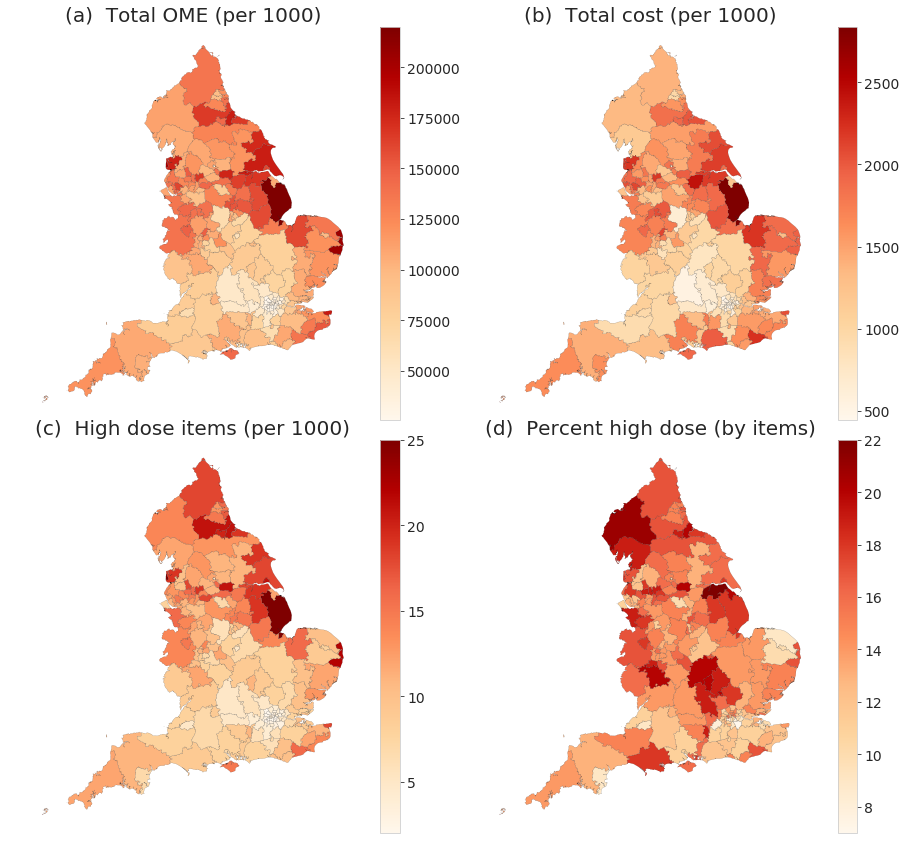

In [90]:
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#from matplotlib import verbose
#verbose.level = 'helpful'    

# from our API https://openprescribing.net/api/1.0/org_location/?org_type=ccg
ccgs = gpd.read_file('ccgs.json').set_index('name')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs
gdf = ccgs.join(spending2)

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'Total OME (per 1000)',0,0,'(a)  '),      (1,'Total cost (per 1000)',0,1,'(b)  '), 
     (2,'High dose items (per 1000)',1,0,'(c)  '),      (3,'Percent high dose (by items)',1,1,'(d)  ')
    ]

fig = plt.figure(figsize=(16,30))
gs = gridspec.GridSpec(4,2)  # grid layout for subplots

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, legend=True, cmap='OrRd')
    ax.set_aspect(1.63)
    ax.set_title(i[4]+i[1],size = 20)
    cb_ax = fig.axes[2*(i[0])+1] # extract legend labels from list of axis/legend labels
    cb_ax.tick_params(labelsize=14)
    plt.axis('off')

plt.subplots_adjust(wspace = 0.05,hspace = 0.05)

#plt.savefig("opioids_Figure3ad_revised.pdf", transparent=True, dpi=300)  
plt.show()

### (e) Plot additional maps for some percentage measures

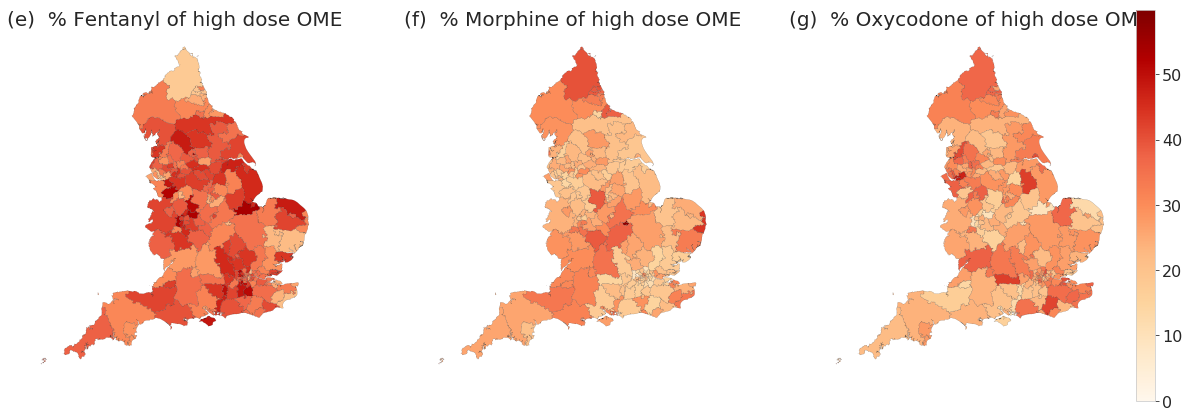

In [91]:
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'% Fentanyl of high dose OME',0,0,'(e)  ',False),      (1,'% Morphine of high dose OME',0,1,'(f)  ',False), 
     (2,'% Oxycodone of high dose OME',0,2,'(g)  ',True)
    ]

fig = plt.figure(figsize=(17,6))
#plt.subplots(ncols=3)
gs = gridspec.GridSpec(1,3, width_ratios=[4,4,5])  # grid layout for subplots; 
# adjust ratios to allow all plots to appear same size despite the third having a legend.

# set common value limits for colour scale
vmin = 0
vmax = gdf[["% Fentanyl of high dose OME","% Morphine of high dose OME","% Oxycodone of high dose OME"]].max().max()*1.05

for i in s:
    ax = plt.subplot(gs[0,i[0]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, cmap='OrRd', legend = i[5], vmin=vmin, vmax=vmax)   
    ax.set_title(i[4]+i[1],size = 20)
    ax.set_aspect(1.63)  # aspect for correct lat/long
    plt.axis('off')
cb_ax = fig.axes[3] # take legend label (4th item in list of axis/legend labels for all plots)
cb_ax.tick_params(labelsize=16) # set label size for legend

plt.tight_layout()
#plt.savefig("opioids_Figure3eg_revised.pdf", transparent=True, dpi=300)  
plt.show()

/home/sebbacon/.virtualenvs/opioid/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


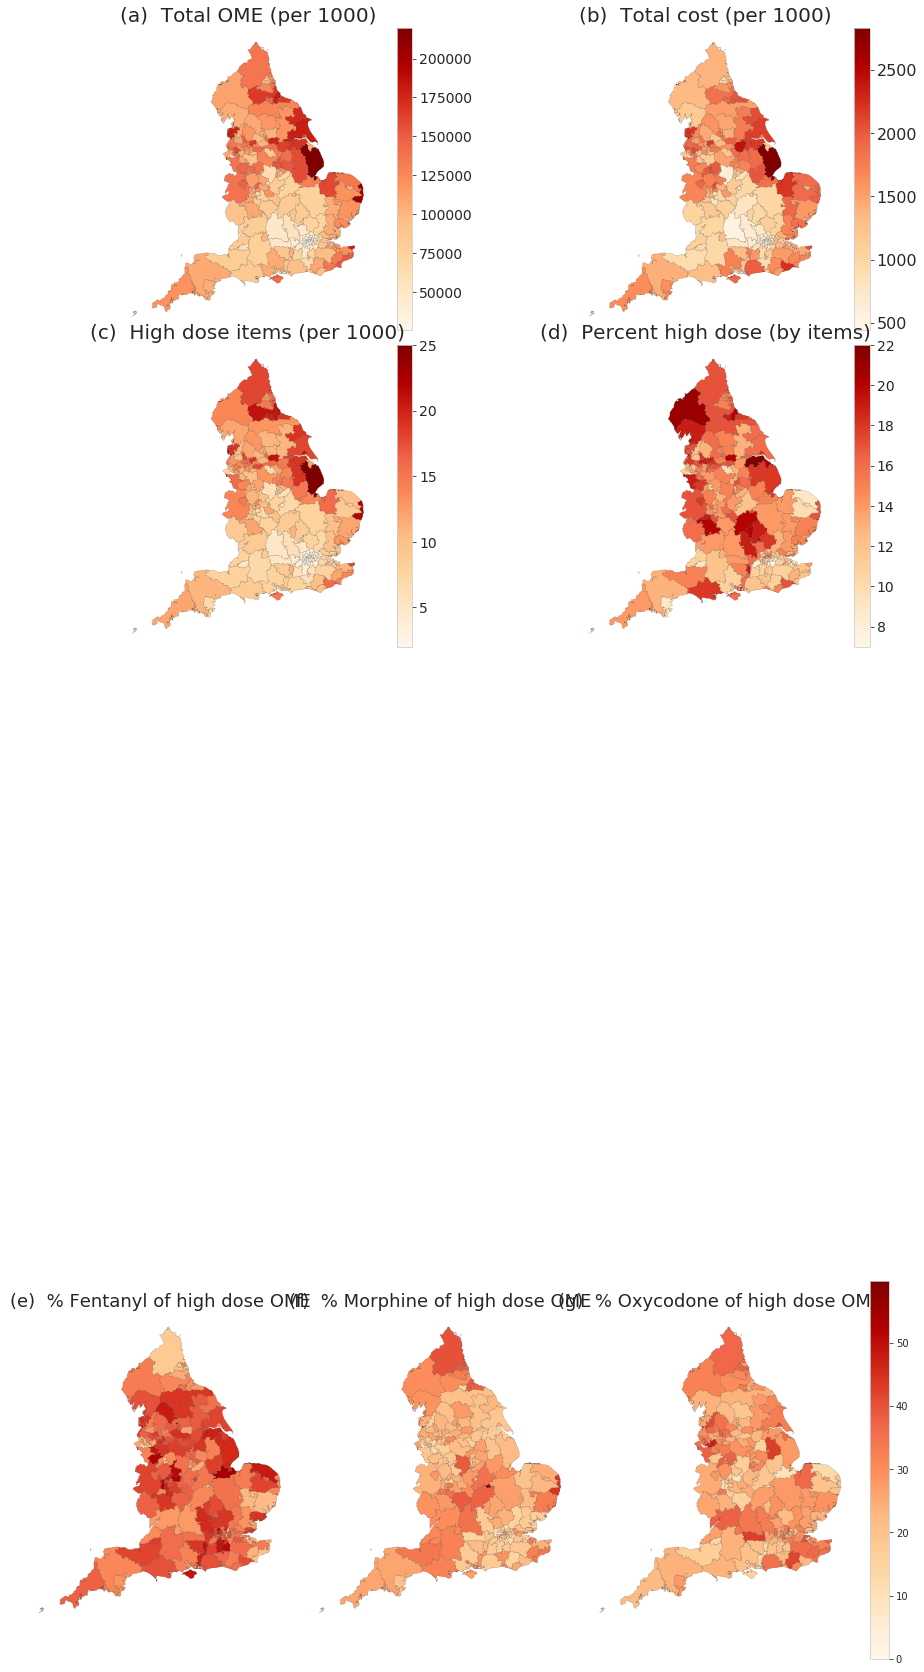

In [92]:
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#from matplotlib import verbose
#verbose.level = 'helpful'    

# from our API https://openprescribing.net/api/1.0/org_location/?org_type=ccg
ccgs = gpd.read_file('ccgs.json').set_index('name')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs
gdf = ccgs.join(spending2)

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'Total OME (per 1000)',0,0,'(a)  '),      (1,'Total cost (per 1000)',0,1,'(b)  '), 
     (2,'High dose items (per 1000)',1,0,'(c)  '),      (3,'Percent high dose (by items)',1,1,'(d)  ')
    ]

fig = plt.figure(figsize=(16,30))
gs1 = gridspec.GridSpec(4,2)  # grid layout for subplots

gs1.update(bottom=0.3, wspace=0.05,hspace = 0.05)

for i in s:
    ax = plt.subplot(gs1[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, legend=True, cmap='OrRd')
    ax.set_aspect(1.63)
    ax.set_title(i[4]+i[1],size = 20)
    cb_ax = fig.axes[2*(i[0])+1] # extract legend labels from list of axis/legend labels
    cb_ax.tick_params(labelsize=14)
    plt.axis('off')

#plt.savefig("opioids_Figure3ad_revised.pdf", transparent=True, dpi=300)  
#plt.show()



# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'% Fentanyl of high dose OME',0,0,'(e)  ',False),      (1,'% Morphine of high dose OME',0,1,'(f)  ',False), 
     (2,'% Oxycodone of high dose OME',0,2,'(g)  ',True)
    ]

#fig = plt.figure(figsize=(17,6))
#plt.subplots(ncols=3)
gs2 = gridspec.GridSpec(1,3, width_ratios=[4,4,5])  # grid layout for subplots; 
# adjust ratios to allow all plots to appear same size despite the third having a legend.
gs2.update(top=0.3,wspace=0.05)

# set common value limits for colour scale
vmin = 0
vmax = gdf[["% Fentanyl of high dose OME","% Morphine of high dose OME","% Oxycodone of high dose OME"]].max().max()*1.05

for i in s:
    ax = plt.subplot(gs2[0,i[0]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, cmap='OrRd', legend = i[5], vmin=vmin, vmax=vmax)   
    ax.set_title(i[4]+i[1],size = 18)
    ax.set_aspect(1.63)  # aspect for correct lat/long
    plt.axis('off')
cb_ax = fig.axes[3] # take legend label (4th item in list of axis/legend labels for all plots)
cb_ax.tick_params(labelsize=16) # set label size for legend

plt.tight_layout()
#plt.savefig("opioids_Figure3eg_revised.png", format='png', dpi=300)
plt.show()

## Potential cost savings

In [93]:
# Extract lowest practice percentile for both high-dose items and cost per 1000 population for latest 6 months
lowest_dec = pc[["month","measure","value"]].loc[(pc["month"]>pc["month"].max() - pd.DateOffset(months=6)) 
       & (pc["percentile"] == 0.1)].fillna(0)
lowest_dec.loc[lowest_dec["measure"]=="High dose items (per 1000)","measure"] = "high dose items"
lowest_dec.loc[lowest_dec["measure"]=="Cost high dose opioids (per 1000)","measure"] = "high dose cost"
lowest_dec.loc[lowest_dec["measure"]=="Cost high dose opioids (per item)","measure"] = "high dose costperitem"

# extract data on high dose items
dfs = pd.DataFrame(df2[["practice","month","total_list_size","Items High Dose","Total Cost","Cost High Dose", "Cost high dose opioids (per item)"]].set_index(["practice","month","total_list_size"]).stack()).reset_index().rename(columns={"level_3":"measure",0:"actual_value"})
dfs.loc[dfs["measure"]=="Items High Dose","measure"] = "high dose items"
dfs.loc[dfs["measure"]=="Cost High Dose","measure"] = "high dose cost"
dfs.loc[dfs["measure"]=="Cost high dose opioids (per item)","measure"] = "high dose costperitem"

# merge with lowest decile data (inner join, this restricts data to latest 6 months)
savings = dfs.merge(lowest_dec,on=["month","measure"])

savings["target_value"] = savings["total_list_size"]*savings["value"]/1000
savings["potential_saving"] = savings["actual_value"] - savings["target_value"]
savings = savings.fillna(0)
savings.loc[savings["potential_saving"]<0,"potential_saving"] = 0

print("Practices at the lowest decile over the latest 6 months prescribed: ", lowest_dec.loc[lowest_dec["measure"]=="high dose items"].mean().round(2).value, 
      "items / £", lowest_dec.loc[lowest_dec["measure"]=="high dose cost"].mean().round(2).value, " per 1,000 patients")

print(savings.groupby("measure")["actual_value","potential_saving"].sum())

Practices at the lowest decile over the latest 6 months prescribed:  0.11 items / £ 4.06  per 1,000 patients
                       actual_value  potential_saving
measure                                              
Total Cost             1.407295e+08      8.121548e+07
high dose cost         2.506609e+07      2.066794e+07
high dose costperitem  6.199173e+06      4.662090e+05
high dose items        5.672670e+05      4.523793e+05


In [94]:
# Compare best cost-per-item prices
dfs2 = pd.DataFrame(df2[["practice","month","Items High Dose","Total Cost","Cost High Dose", "Cost high dose opioids (per item)"]])
#dfs2.loc[dfs2["measure"]=="Cost high dose opioids (per item)","measure"] = "high dose costperitem"
savings = dfs2.merge(lowest_dec.loc[lowest_dec.measure=="high dose costperitem"],on=["month"])
savings["target_value"] = savings["Items High Dose"]*savings["value"]
savings["potential_saving"] = savings["Cost High Dose"] - savings["target_value"]

savings = savings.fillna(0).drop("measure",axis=1)
savings.loc[savings["potential_saving"]<0,"potential_saving"] = 0



print("If each practice prescribed at the lowest decile cost-per-item over the latest six months (£", 
      lowest_dec.loc[lowest_dec["measure"]=="high dose costperitem"].mean().round(2).value, 
      "per item), in total they could have saved £", round(savings["potential_saving"].sum(),-3), " out of a total £",
      round(savings["Cost High Dose"].sum(),-3), "(",
      round(100*savings["potential_saving"].sum()/savings["Cost High Dose"].sum(),1), "%)" )


If each practice prescribed at the lowest decile cost-per-item over the latest six months (£ 15.05 per item), in total they could have saved £ 16951000.0  out of a total £ 25066000.0 ( 67.6 %)


## Change by CCG

In [95]:
yr1 = df1.loc[(df1["pct"].str.match(r"([0-9]{2})([A-Za-z])"))& (df1['month'].dt.year>=2016)].reset_index()
yr1["year"] = yr1['month'].dt.year

yr1.head()

,index,pct,practice,status_code,month,chem_substance,Is_LA,Is_High_LA,items,quantity,total_ome,net_cost,actual_cost,year
0,1,00M,A81058,A,2018-06-01 00:00:00+00:00,Hydromorphone Hydrochloride,False,False,1,112,728.0,17.639999,16.379169,2018
1,12,09A,E87017,C,2017-08-01 00:00:00+00:00,NaN,NaN,NaN,0,0,0.0,0.000000,0.000000,2017
2,15,13T,A85008,A,2016-10-01 00:00:00+00:00,Hydromorphone Hydrochloride,True,False,1,60,1200.0,30.799999,28.639999,2016
3,16,11N,L82051,A,2016-07-01 00:00:00+00:00,Hydromorphone Hydrochloride,False,False,4,392,2548.0,61.740002,57.270000,2016
4,19,06M,D83002,A,2017-07-01 00:00:00+00:00,Dipipanone Hydrochloride,False,NaN,2,400,2000.0,3092.239990,2861.006592,2017


In [96]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13484221 entries, 0 to 13484220
Data columns (total 12 columns):
pct               category
practice          object
status_code       category
month             datetime64[ns, UTC]
chem_substance    object
Is_LA             category
Is_High_LA        category
items             Int16
quantity          Int64
total_ome         float32
net_cost          float32
actual_cost       float32
dtypes: Int16(1), Int64(1), category(4), datetime64[ns, UTC](1), float32(3), object(2)
memory usage: 681.6+ MB


In [97]:
yr1 = df1.loc[(df1["pct"].str.match(r"([0-9]{2})([A-Za-z])"))& (df1['month'].dt.year>=2016)].reset_index()
yr1["year"] = yr1['month'].dt.year
yr1.head()

,index,pct,practice,status_code,month,chem_substance,Is_LA,Is_High_LA,items,quantity,total_ome,net_cost,actual_cost,year
0,1,00M,A81058,A,2018-06-01 00:00:00+00:00,Hydromorphone Hydrochloride,False,False,1,112,728.0,17.639999,16.379169,2018
1,12,09A,E87017,C,2017-08-01 00:00:00+00:00,NaN,NaN,NaN,0,0,0.0,0.000000,0.000000,2017
2,15,13T,A85008,A,2016-10-01 00:00:00+00:00,Hydromorphone Hydrochloride,True,False,1,60,1200.0,30.799999,28.639999,2016
3,16,11N,L82051,A,2016-07-01 00:00:00+00:00,Hydromorphone Hydrochloride,False,False,4,392,2548.0,61.740002,57.270000,2016
4,19,06M,D83002,A,2017-07-01 00:00:00+00:00,Dipipanone Hydrochloride,False,NaN,2,400,2000.0,3092.239990,2861.006592,2017


In [98]:
yr2 = yr1[["pct","practice","month","year","total_ome"]].groupby(["pct","practice","month","year"])['total_ome'].sum()
yr2 = yr2.reset_index().merge(pop[["practice","month","total_list_size"]], on=["practice","month"]).groupby(["pct","month","year"]).sum()
yr2.head()

total_ome  total_list_size
pct month                     year                            
00C 2016-01-01 00:00:00+00:00 2016  4349418.5         107232.0
                              2017        NaN              NaN
                              2018        NaN              NaN
                              2019        NaN              NaN
    2016-02-01 00:00:00+00:00 2016  4527054.0         107232.0

In [99]:
yr2 = yr2.reset_index().groupby(['pct','year']).agg({'total_list_size':'mean','total_ome':"sum"})
yr2["OME_per_1000"] = 1000*yr2["total_ome"]/yr2.total_list_size
yr2 = yr2.drop(['total_list_size','total_ome'],axis=1).unstack().reset_index(col_level=1)
yr2.columns = yr2.columns.droplevel()
yr2 = yr2.drop(2018,axis=1)
yr2["change"] = yr2[2017]-yr2[2016]
yr2["%change"] = 100*(yr2["change"])/yr2[2016]
yr2 = yr2.sort_values(by="change").reset_index(drop=True)
yr2.head()

year,pct,2016,2017,2019,change,%change
0,02D,581128.768685,521703.621972,72741.730877,-59425.146713,-10.225814
1,11N,591323.431074,545538.221106,79096.400740,-45785.209968,-7.742837
2,06M,872474.082985,831612.194852,111482.586739,-40861.888133,-4.683450
3,01A,534503.002744,498321.939435,79017.378211,-36181.063309,-6.769104
4,09F,506436.944198,475066.750657,66643.384102,-31370.193541,-6.194294


In [100]:
change = yr2.copy()

change2 = change.merge(names[['code','name']],left_on="pct",right_on="code")
change2 = change2.drop([2016,2017,"code"],axis=1).set_index('name')

change2.sort_values(by="change") # 195 rows

,pct,2019,change,%change
name,,,,
NHS VALE ROYAL CCG,02D,72741.730877,-59425.146713,-10.225814
NHS KERNOW CCG,11N,79096.400740,-45785.209968,-7.742837
NHS GREAT YARMOUTH AND WAVENEY CCG,06M,111482.586739,-40861.888133,-4.683450
NHS EAST LANCASHIRE CCG,01A,79017.378211,-36181.063309,-6.769104
"NHS EASTBOURNE, HAILSHAM AND SEAFORD CCG",09F,66643.384102,-31370.193541,-6.194294
"NHS AIREDALE, WHARFEDALE AND CRAVEN CCG",02N,61208.955675,-30412.217425,-6.986055
NHS BRADFORD DISTRICTS CCG,02R,68389.780721,-29359.288809,-5.893637
NHS FAREHAM AND GOSPORT CCG,10K,67271.155291,-28048.360522,-6.190257
NHS DONCASTER CCG,02X,98403.785504,-27745.152923,-3.920835


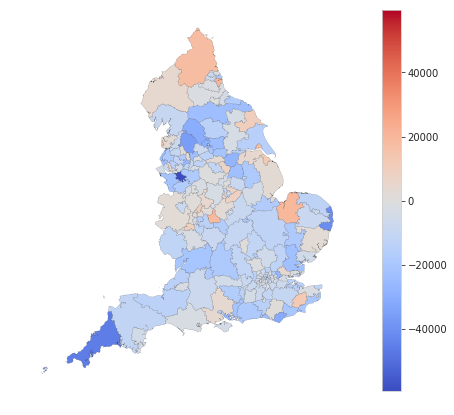

In [101]:
import matplotlib.gridspec as gridspec
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
#from matplotlib import verbose
#verbose.level = 'helpful'    
import matplotlib.colors as colors

cmap = 'coolwarm'
#bounds = np.array([-60000,-45000, -30000, -15000, 0, 0, 5000, 10000,15000, 20000])
#norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)


# from our API https://openprescribing.net/api/1.0/org_location/?org_type=ccg
ccgs = gpd.read_file('ccgs.json').set_index('name')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs
gdf = ccgs.join(change2)

vmax = -gdf["change"].min() # set max of scale to reflect minimum such that zero falls in centre of scale.

fig, ax = plt.subplots(figsize=(12, 7))
g = gdf.plot(ax=ax,column="change",  edgecolor='black', linewidth=0.1, legend=True, cmap=cmap, vmax=vmax)
ax.set_aspect(1.63)
#cb_ax = fig.axes[2*(i[0])+1] # extract legend labels from list of axis/legend labels
#cb_ax.tick_params(labelsize=14)
plt.axis('off')
#fig.colorbar(g, ax=ax, extend='both', orientation='vertical')

plt.show()


# All practice types

In [105]:
q5 = '''
-- opioids - including all practices

WITH q2 AS (
  SELECT 
    s.practice, 
    s.pct_id AS pct,
    CAST(s.month AS DATE) AS year_mon, 
    CASE WHEN prac.setting = 4 THEN "GP" ELSE "other" END AS type,
    MAX(total_list_size) AS total_list_size
  FROM ebmdatalab.hscic.practice_statistics_all_years s
  INNER JOIN  ebmdatalab.hscic.practices prac ON prac.code=s.practice 

  GROUP BY practice, pct, type, year_mon )

-- join practices to opioid prescribing data and group to CCGs
SELECT 
  COALESCE(p.pct,q2.pct) AS pct,
  q2.year_mon AS month,
  type,
  l.chem_substance,
  Is_LA,
  Is_High_LA,
  sum(p.items) as items, 
  sum(quantity) as quantity,
  sum(quantity*dose_per_unit*new_ome_multiplier) AS total_ome,
  sum(net_cost) as net_cost,
  sum(actual_cost) as actual_cost
FROM q2 
LEFT JOIN ebmdatalab.helen.opioid_prescribing_2010_2018 p ON p.practice = q2.practice AND CAST(p.month AS DATE) = q2.year_mon  
INNER JOIN (SELECT distinct bnf_code, chem_substance, Is_High_LA, Is_LA, dose_per_unit, new_ome_multiplier FROM ebmdatalab.richard.opioid_converter) l on l.bnf_code = p.bnf_code
INNER JOIN `hscic.ccgs` c ON c.code = p.pct AND org_type = "CCG"

GROUP BY 
  pct,
  type,
  month,
  chem_substance,
  Is_LA,
  Is_High_LA
'''

'''opioid prescribing data extracted as follows:
select *
FROM ebmdatalab.hscic.normalised_prescribing_standard p
WHERE SUBSTR(p.bnf_code,1,6) IN ("040201","040702","100101")'''


ccg = bq.cached_read(q5, 'opiods_by_practice_setting.csv.gz')
ccg.head()

,pct,month,type,chem_substance,Is_LA,Is_High_LA,items,quantity,total_ome,net_cost,actual_cost
0,05J,2010-12-01,GP,Papaveretum,False,None,1,10,400.0,138.20,127.30
1,06W,2011-07-01,GP,Dextromoramide Tartrate,False,None,1,300,6000.0,668.00,615.39
2,06A,2012-07-01,GP,Dextromoramide Tartrate,False,None,2,180,3600.0,520.80,480.62
3,00L,2011-06-01,GP,Morphine Hydrochloride,False,None,1,100,2000.0,283.34,261.09
4,05D,2012-02-01,GP,Morphine Hydrochloride,False,None,1,12,120.0,82.12,75.81


In [106]:
c2 = ccg.copy()#.loc[ccg["Is_High_LA"]=="TRUE"]
c2["month"] = pd.to_datetime(c2.month)
c2 = c2.loc[c2["month"]>c2["month"].max() - pd.DateOffset(months=6)]
c2 = pd.DataFrame(c2.groupby(["pct","type"])["total_ome"].sum()).unstack() #.sort_values(by="total_ome").transpose()    # "pct","Is_LA","Is_High_LA"c
c2.columns = c2.columns.droplevel()
c2["ome_percent_nongp"] = 100*c2.other / (c2.other+c2.GP)
print(c2["ome_percent_nongp"].count(), 'CCGs have data on opioid prescribing from non-standard practices,')
print('accounting for a maximum of ',c2["ome_percent_nongp"].max().round(3), '% of CCG opioid prescribing')

13 CCGs have data on opioid prescribing from non-standard practices,
accounting for a maximum of  0.877 % of CCG opioid prescribing


### Which opioids are high-dose

In [107]:
q = '''

SELECT 
  chem_substance,
  bnf_code,
  drug_name,
  dose_per_unit as total_dose_per_unit_mg,
  LA_doseshourduration as duration_hrs,
  LA_daily_dose as daily_dose,
   new_ome_multiplier as ome_multiplier,
  LA_daily_OME as daily_OME

FROM ebmdatalab.richard.opioid_converter
WHERE Is_High_LA IN ("True","TRUE")

 
order by chem_substance, dose_per_unit desc
  
    '''


tbl = bq.cached_read(q, csv_path='opioids_high_dose_formulations.csv')
tbl.head()

,chem_substance,bnf_code,drug_name,total_dose_per_unit_mg,duration_hrs,daily_dose,ome_multiplier,daily_OME
0,Buprenorphine,0407020B0BIACAG,Bupeaze_Transdermal Patch 70mcg/hr(96hr),6.72,96,1.68,100.0,168.0
1,Buprenorphine,0407020B0BDACAG,Transtec_T/Derm Patch 70mcg/hr (40mg),6.72,96,1.68,100.0,168.0
2,Buprenorphine,0407020B0BJACAG,Prenotrix_T/Derm Patch 70mcg/hr,6.72,96,1.68,100.0,168.0
3,Buprenorphine,0407020B0AAAGAG,Buprenorphine_Patch 70mcg/hr (96hr),6.72,96,1.68,100.0,168.0
4,Buprenorphine,0407020B0BPACAG,Relevtec_Transdermal Patch 70mcg/hr,6.72,96,1.68,100.0,168.0
